<a href="https://colab.research.google.com/github/syafiqahmarsya/project-data-MixITup-Ice-Cream/blob/main/Project__Data_MixITup_Ice_Cream.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **KELOMPOK H**

| Nama | NIM | Kelas |
| -------- | -------- | -------- |
| Nazwa Aulia  | 11220940000026   | DS2   |
| Hoirotun Nisa'| 11220940000003   | DS2   |
| Putri Maesarah  | 11220940000046   | DS2   |
| Syafiqah Marsya Kholiyadi  | 11220940000056   | DS2   |
| Tonny Pramudya Bagus Santoso  | 11210940000073   | DS2   |


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import numpy as np

In [6]:
try:
    data = pd.read_excel("data/Case-Study-02-MixITup.xlsx", sheet_name='Data')
except FileNotFoundError:
    !mkdir data
    !wget -P data/ https://raw.githubusercontent.com/syafiqahmarsya/project-data-MixITup-Ice-Cream/refs/heads/main/Case-Study-02-MixITup.xlsx
    data = pd.read_excel("data/Case-Study-02-MixITup.xlsx",sheet_name='Data')

--2025-01-23 15:43:10--  https://raw.githubusercontent.com/syafiqahmarsya/project-data-MixITup-Ice-Cream/refs/heads/main/Case-Study-02-MixITup.xlsx
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 28020 (27K) [application/octet-stream]
Saving to: ‘data/Case-Study-02-MixITup.xlsx’

Case-Study-02-MixIT 100%[===================>]  27.36K  --.-KB/s    in 0.002s  

2025-01-23 15:43:10 (16.8 MB/s) - ‘data/Case-Study-02-MixITup.xlsx’ saved [28020/28020]



In [7]:
data

,ID,Jenis Kelamin,Umur,Pendapatan-per-bulan,skor-pengeluaran,Menikah,Kota,Promo,HariFav,FavFlavor
0,101,Wanita,49,13114754,52,1,Jakarta,1.0,Sabtu,2
1,102,Wanita,32,33606557,86,1,Depok,1.0,Minggu,6
2,103,Pria,51,15983606,41,1,Jakarta,2.0,Minggu,3
3,104,Pria,19,12704918,55,0,Jakarta,1.0,Rabu,7
4,105,Wanita,38,20081967,42,1,Jakarta,2.0,Senin,8
...,...,...,...,...,...,...,...,...,...,...
195,296,Pria,31,4098360,73,1,Depok,1.0,Senin,0
196,297,Pria,57,15983606,51,1,Jakarta,1.0,Minggu,5
197,298,Wanita,35,43032786,79,1,Depok,1.0,Senin,7
198,299,Wanita,23,1229508,94,1,Depok,0.0,Selasa,0


## **Informasi Data**

### Data Info

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    200 non-null    int64  
 1   Jenis Kelamin         196 non-null    object 
 2   Umur                  200 non-null    object 
 3   Pendapatan-per-bulan  200 non-null    int64  
 4   skor-pengeluaran      200 non-null    int64  
 5   Menikah               188 non-null    object 
 6   Kota                  200 non-null    object 
 7   Promo                 194 non-null    float64
 8   HariFav               200 non-null    object 
 9   FavFlavor             200 non-null    int64  
dtypes: float64(1), int64(4), object(5)
memory usage: 15.8+ KB


In [ ]:
# Menghapus kolom ID
data.drop('ID', axis = 1, inplace =True)
data

,Jenis Kelamin,Umur,Pendapatan-per-bulan,skor-pengeluaran,Menikah,Kota,Promo,HariFav,FavFlavor
0,Wanita,49,13114754,52,1,Jakarta,1.0,Sabtu,2
1,Wanita,32,33606557,86,1,Depok,1.0,Minggu,6
2,Pria,51,15983606,41,1,Jakarta,2.0,Minggu,3
3,Pria,19,12704918,55,0,Jakarta,1.0,Rabu,7
4,Wanita,38,20081967,42,1,Jakarta,2.0,Senin,8
...,...,...,...,...,...,...,...,...,...
195,Pria,31,4098360,73,1,Depok,1.0,Senin,0
196,Pria,57,15983606,51,1,Jakarta,1.0,Minggu,5
197,Wanita,35,43032786,79,1,Depok,1.0,Senin,7
198,Wanita,23,1229508,94,1,Depok,0.0,Selasa,0


### Statistika Deskriptif

In [ ]:
data.describe(include='all')

,Jenis Kelamin,Umur,Pendapatan-per-bulan,skor-pengeluaran,Menikah,Kota,Promo,HariFav,FavFlavor
count,196,200.0,2.000000e+02,200.00000,188.0,200,194.000000,200,200.000000
unique,3,45.0,NaN,NaN,4.0,4,NaN,7,NaN
top,Wanita,32.0,NaN,NaN,1.0,Jakarta,NaN,Senin,NaN
freq,109,11.0,NaN,NaN,160.0,87,NaN,66,NaN
mean,NaN,NaN,1.867213e+07,50.47000,NaN,NaN,1.685567,NaN,3.605000
std,NaN,NaN,1.076423e+07,26.07101,NaN,NaN,0.970603,NaN,2.743466
min,NaN,NaN,0.000000e+00,1.00000,NaN,NaN,0.000000,NaN,0.000000
25%,NaN,NaN,1.086066e+07,34.75000,NaN,NaN,1.000000,NaN,1.000000
50%,NaN,NaN,1.905738e+07,50.00000,NaN,NaN,1.000000,NaN,3.500000
75%,NaN,NaN,2.581967e+07,73.00000,NaN,NaN,3.000000,NaN,6.000000


## **Preprocessing**

### Duplikasi

In [ ]:
# Cek duplikasi Data
data.duplicated().sum()

0

### Noise

Mengatasi Noise dalam kolom Kota

In [ ]:
data['Kota'].unique()

array(['Jakarta', 'Depok', 'Tangerang', 'JJakarta'], dtype=object)

In [ ]:
# Ubah JJakarta jadi Jakarta
data['Kota'] = data['Kota'].replace('JJakarta', 'Jakarta')

In [ ]:
#Setelah diubah
data['Kota'].unique()

array(['Jakarta', 'Depok', 'Tangerang'], dtype=object)

Mengatasi Noise dalam kolom Jenis Kelamin

In [ ]:
data['Jenis Kelamin'].unique()

array(['Wanita', 'Pria', nan, '-'], dtype=object)

In [ ]:
#ubah '-' jadi nan supaya mempermudah saat mengatasi missing value
data['Jenis Kelamin'] = data['Jenis Kelamin'].replace('-', np.nan)

In [ ]:
data['Jenis Kelamin'].unique()

array(['Wanita', 'Pria', nan], dtype=object)

Mengatasi Noise dalam kolom Menikah

In [ ]:
data['Menikah'].unique()

array([1, 0, nan, ' ', '-'], dtype=object)

In [ ]:
data.loc[data['Menikah'] == ' ']

,Jenis Kelamin,Umur,Pendapatan-per-bulan,skor-pengeluaran,Menikah,Kota,Promo,HariFav,FavFlavor
151,Pria,30,34426229,97,,Depok,NaN,Sabtu,0


In [ ]:
# Ubah ' ' dan "-" jadi nan
data['Menikah'] = data['Menikah'].replace(' ', np.nan)

In [ ]:
data['Menikah']=data['Menikah'].replace("-", np.nan)

<ipython-input-17-3d59d62df2e6>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Menikah']=data['Menikah'].replace("-", np.nan)


In [ ]:
data['Menikah'].unique()

array([ 1.,  0., nan])

Mengatasi Noise dalam kolom Umur

In [ ]:
data['Umur'].unique()

array([49, 32, 51, 19, 38, 33, 27, 24, 21, 31, 36, 46, 60, 58, 47, 45, 22,
       18, 59, 44, 39, 35, 20, 30, 23, 48, 37, 40, 34, 41, 53, 54, 28, 55,
       25, 50, 42, 29, 43, 52, 2, "35'", 56, 26, 57], dtype=object)

In [ ]:
data.loc[data['Umur'] == "35'" ]

,Jenis Kelamin,Umur,Pendapatan-per-bulan,skor-pengeluaran,Menikah,Kota,Promo,HariFav,FavFlavor
134,Wanita,35',2459016,35,NaN,Tangerang,3.0,Senin,5


In [ ]:
# Ubah 35' jadi 35
data['Umur'] = data['Umur'].replace("35'", 35)

<ipython-input-21-6fafacce0fa7>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Umur'] = data['Umur'].replace("35'", 35)


In [ ]:
## Ini dianggap noise karena tidak mungkin anak berusia 2 th memiliki pendapatan sebesar 18.032.786
data.loc[data['Umur'] == 2 ]

,Jenis Kelamin,Umur,Pendapatan-per-bulan,skor-pengeluaran,Menikah,Kota,Promo,HariFav,FavFlavor
119,Pria,2,18032786,41,0.0,Jakarta,2.0,Senin,0


In [ ]:
#Hapus data.loc[data['Umur']==2]
data.drop(data.loc[data['Umur']==2].index,inplace=True)

In [ ]:
#Setelah penghapusan
data["Umur"].unique()

array([49, 32, 51, 19, 38, 33, 27, 24, 21, 31, 36, 46, 60, 58, 47, 45, 22,
       18, 59, 44, 39, 35, 20, 30, 23, 48, 37, 40, 34, 41, 53, 54, 28, 55,
       25, 50, 42, 29, 43, 52, 56, 26, 57])

Mengatasi Noise dalam kolom FavFlavor

In [ ]:
data['FavFlavor'].unique()

array([2, 6, 3, 7, 8, 0, 5, 4, 1, 9])

In [ ]:
#Varian rasa 9 dianggap noise karena pada deskripsi data FavFlavor hanya memiliki varian rasa dari 0 s.d. 8
data.loc[data['FavFlavor'] == 9]

,Jenis Kelamin,Umur,Pendapatan-per-bulan,skor-pengeluaran,Menikah,Kota,Promo,HariFav,FavFlavor
130,Wanita,44,25819672,20,1.0,Tangerang,3.0,Sabtu,9


In [ ]:
#Hapus data.loc[data['FavFlavor]==9]
data.drop(data.loc[data['FavFlavor']==9].index,inplace=True)
#Data setelah dilakukan penghapusan
data['FavFlavor'].unique()

array([2, 6, 3, 7, 8, 0, 5, 4, 1])

Mengatasi Noise dalam kolom Promo

In [ ]:
data['Promo'].unique()

array([ 1.,  2.,  0., nan,  3.,  5.])

In [ ]:
#Promo 5 dianggap noise karena pada deskripsi data Promo hanya memiliki nilai 0 hingga 3
data.loc[data['Promo'] == 5]

,Jenis Kelamin,Umur,Pendapatan-per-bulan,skor-pengeluaran,Menikah,Kota,Promo,HariFav,FavFlavor
14,Wanita,58,2049180,15,1.0,Tangerang,5.0,Sabtu,8


In [ ]:
#Hapus data noise dalam promo
data.drop(data.loc[data['Promo']==5].index,inplace=True)
#Data setelah dilakukan penghapusan
data['Promo'].unique()

array([ 1.,  2.,  0., nan,  3.])

Mengatasi Noise dalam kolom skor-pengeluaran

In [ ]:
data['skor-pengeluaran'].unique()

array([ 52,  86,  41,  55,  42,  95,  56,  77,  47,  54,  92,  15,   4,
        50,  16,  87,  32,  28,  79,  59,  60,   7,  75,  57,   6,  73,
        69,  40,   5,  89,  49,  13,  88,  48,  10,  36,   3,  31,  39,
        46,  83,  68,  14,  24,  65,  91,  61,  90,  58,  93,  34,  44,
        17,  53,  97,  27,  11,  43,  22,  18,  35,  99,  66,  29,   9,
        45,  23,  82, 101,  51,  72,  71,  20,   1,  81,  98,  26,  76,
        78,  63,  74,  85,  12,   8,  94])

In [ ]:
#skor pengeluaran 101 dianggap noise karena pada deskripsi data skor pengeluaran hanya memiliki nilai 0 hingga 100
data.loc[data['skor-pengeluaran'] == 101]

,Jenis Kelamin,Umur,Pendapatan-per-bulan,skor-pengeluaran,Menikah,Kota,Promo,HariFav,FavFlavor
126,Wanita,47,18442622,101,NaN,Jakarta,2.0,Minggu,7


In [ ]:
#Hapus data karena skor pengeluaran hanya bernilai antara 0-100
data.drop(data.loc[data['skor-pengeluaran']==101].index,inplace=True)
#Data setelah dilakukan penghapusan
data['skor-pengeluaran'].unique()

array([52, 86, 41, 55, 42, 95, 56, 77, 47, 54, 92, 15,  4, 50, 16, 87, 32,
       28, 79, 59, 60,  7, 75, 57,  6, 73, 69, 40,  5, 89, 49, 13, 88, 48,
       10, 36,  3, 31, 39, 46, 83, 68, 14, 24, 65, 91, 61, 90, 58, 93, 34,
       44, 17, 53, 97, 27, 11, 43, 22, 18, 35, 99, 66, 29,  9, 45, 23, 82,
       51, 72, 71, 20,  1, 81, 98, 26, 76, 78, 63, 74, 85, 12,  8, 94])

### Missing Value

In [ ]:
data.isnull().sum()

,0
Jenis Kelamin,5
Umur,0
Pendapatan-per-bulan,0
skor-pengeluaran,0
Menikah,13
Kota,0
Promo,6
HariFav,0
FavFlavor,0


In [ ]:
#Menghapus missing value karena jumlahnya sedikit
data.dropna(subset=['Jenis Kelamin', 'Menikah', 'Promo'], inplace=True)
data.isnull().sum()

,0
Jenis Kelamin,0
Umur,0
Pendapatan-per-bulan,0
skor-pengeluaran,0
Menikah,0
Kota,0
Promo,0
HariFav,0
FavFlavor,0


In [ ]:
data

,Jenis Kelamin,Umur,Pendapatan-per-bulan,skor-pengeluaran,Menikah,Kota,Promo,HariFav,FavFlavor
0,Wanita,49,13114754,52,1.0,Jakarta,1.0,Sabtu,2
1,Wanita,32,33606557,86,1.0,Depok,1.0,Minggu,6
2,Pria,51,15983606,41,1.0,Jakarta,2.0,Minggu,3
3,Pria,19,12704918,55,0.0,Jakarta,1.0,Rabu,7
4,Wanita,38,20081967,42,1.0,Jakarta,2.0,Senin,8
...,...,...,...,...,...,...,...,...,...
195,Pria,31,4098360,73,1.0,Depok,1.0,Senin,0
196,Pria,57,15983606,51,1.0,Jakarta,1.0,Minggu,5
197,Wanita,35,43032786,79,1.0,Depok,1.0,Senin,7
198,Wanita,23,1229508,94,1.0,Depok,0.0,Selasa,0


### Ubah tipe data

In [ ]:
data.dtypes

,0
Jenis Kelamin,object
Umur,int64
Pendapatan-per-bulan,int64
skor-pengeluaran,int64
Menikah,float64
Kota,object
Promo,float64
HariFav,object
FavFlavor,int64


In [ ]:
data['Menikah'] = pd.to_numeric(data['Menikah'], errors='coerce').astype('Int64')
data['Promo'] = pd.to_numeric(data['Promo'], errors='coerce').astype('Int64')
data[['Jenis Kelamin','HariFav','FavFlavor','Promo', 'Kota','Menikah']] = data[['Jenis Kelamin','HariFav','FavFlavor','Promo', 'Kota','Menikah']].astype('category')
data.dtypes

,0
Jenis Kelamin,category
Umur,int64
Pendapatan-per-bulan,int64
skor-pengeluaran,int64
Menikah,category
Kota,category
Promo,category
HariFav,category
FavFlavor,category


### Outlier

In [ ]:
# Statistika Deskriptif
data.describe(include='all')

,Jenis Kelamin,Umur,Pendapatan-per-bulan,skor-pengeluaran,Menikah,Kota,Promo,HariFav,FavFlavor
count,173,173.000000,1.730000e+02,173.000000,173.0,173,173.0,173,173.0
unique,2,NaN,NaN,NaN,2.0,3,4.0,7,9.0
top,Wanita,NaN,NaN,NaN,1.0,Jakarta,1.0,Senin,0.0
freq,93,NaN,NaN,NaN,149.0,76,82.0,61,35.0
mean,NaN,37.179191,1.864636e+07,50.884393,NaN,NaN,NaN,NaN,NaN
std,NaN,12.023099,1.058813e+07,25.969984,NaN,NaN,NaN,NaN,NaN
min,NaN,18.000000,0.000000e+00,1.000000,NaN,NaN,NaN,NaN,NaN
25%,NaN,27.000000,1.106557e+07,35.000000,NaN,NaN,NaN,NaN,NaN
50%,NaN,36.000000,1.885246e+07,51.000000,NaN,NaN,NaN,NaN,NaN
75%,NaN,47.000000,2.540984e+07,73.000000,NaN,NaN,NaN,NaN,NaN


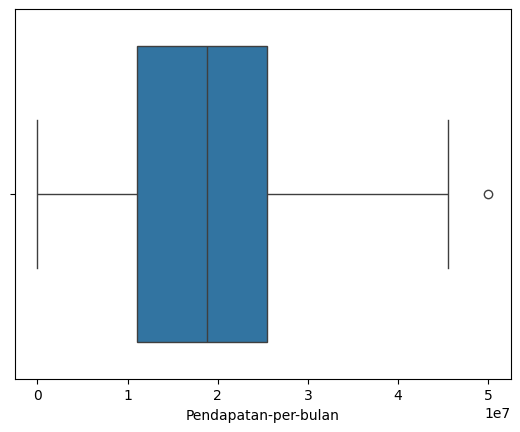

In [ ]:
#cek outlier berdasarkan pendapatan per bulan dengan boxplot
p= sns.boxplot(x='Pendapatan-per-bulan', data= data)

In [ ]:
# mengatasi outlier dengan metode IQR
Q1 = data['Pendapatan-per-bulan'].quantile(0.25)
Q2 = data['Pendapatan-per-bulan'].quantile(0.50)
Q3 = data['Pendapatan-per-bulan'].quantile(0.75)
IQR = Q3 - Q1 #IQR adalah interquartile range.
print("Q1={}, Q3={}, IQR={}".format(Q1, Q3, IQR))

outliers_bawah = (data['Pendapatan-per-bulan'] < (Q1 - 1.5 *IQR)) # Outlier bawah
outliers_atas = (data['Pendapatan-per-bulan']> (Q3 + 1.5 *IQR)) # Outlier atas
pendapatan_rendah= data.loc[outliers_bawah]
pendapatan_tinggi = data.loc[outliers_atas]

no_outlier = (data['Pendapatan-per-bulan']>= Q1 - 1.5 * IQR) & (data['Pendapatan-per-bulan'] <= Q3 + 1.5 *IQR)
data_clean= data[no_outlier]
print(data.shape)
data_clean.reset_index(drop=True, inplace=True)
data_clean

Q1=11065573.0, Q3=25409836.0, IQR=14344263.0
(173, 9)


,Jenis Kelamin,Umur,Pendapatan-per-bulan,skor-pengeluaran,Menikah,Kota,Promo,HariFav,FavFlavor
0,Wanita,49,13114754,52,1,Jakarta,1,Sabtu,2
1,Wanita,32,33606557,86,1,Depok,1,Minggu,6
2,Pria,51,15983606,41,1,Jakarta,2,Minggu,3
3,Pria,19,12704918,55,0,Jakarta,1,Rabu,7
4,Wanita,38,20081967,42,1,Jakarta,2,Senin,8
...,...,...,...,...,...,...,...,...,...
167,Pria,31,4098360,73,1,Depok,1,Senin,0
168,Pria,57,15983606,51,1,Jakarta,1,Minggu,5
169,Wanita,35,43032786,79,1,Depok,1,Senin,7
170,Wanita,23,1229508,94,1,Depok,0,Selasa,0


In [ ]:
#OUTLIER
pendapatan_tinggi

,Jenis Kelamin,Umur,Pendapatan-per-bulan,skor-pengeluaran,Menikah,Kota,Promo,HariFav,FavFlavor
66,Pria,30,50000000,83,1,Depok,1,Sabtu,3


In [ ]:
pendapatan_rendah

,Jenis Kelamin,Umur,Pendapatan-per-bulan,skor-pengeluaran,Menikah,Kota,Promo,HariFav,FavFlavor


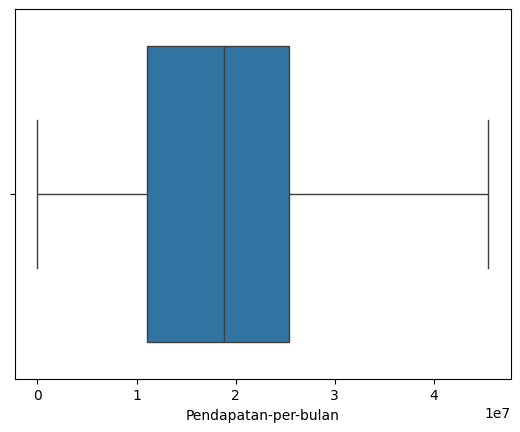

In [ ]:
#data setelah penghpusan outlier
p= sns.boxplot(x='Pendapatan-per-bulan', data= data_clean)

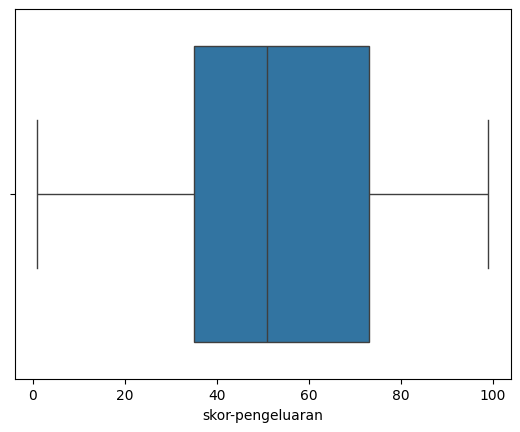

In [ ]:
## Outlier untuk skor pengeluaran
p=sns.boxplot(x='skor-pengeluaran',data=data)

## **EDA**

### Visualisasi Data

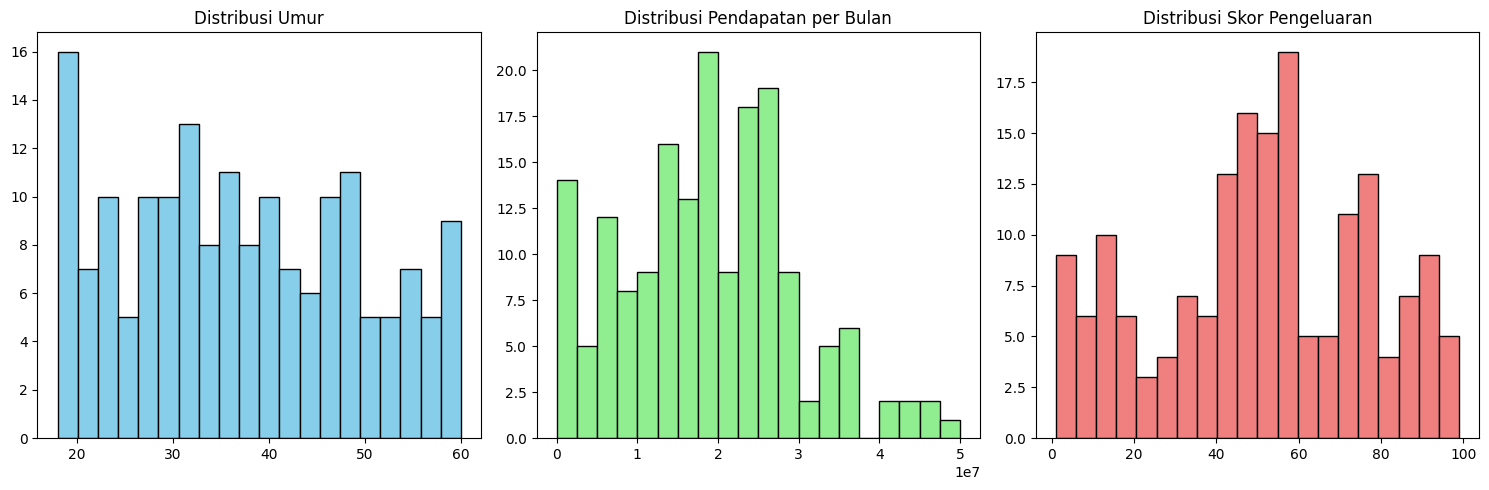

In [ ]:
# Histogram untuk kolom Umur, Pendapatan-per-bulan, dan skor-pengeluaran
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.hist(data['Umur'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribusi Umur')

plt.subplot(1, 3, 2)
plt.hist(data['Pendapatan-per-bulan'], bins=20, color='lightgreen', edgecolor='black')
plt.title('Distribusi Pendapatan per Bulan')

plt.subplot(1, 3, 3)
plt.hist(data['skor-pengeluaran'], bins=20, color='lightcoral', edgecolor='black')
plt.title('Distribusi Skor Pengeluaran')

plt.tight_layout()
plt.show()

<ipython-input-47-d19d6c5be19c>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Jenis Kelamin', data=data, palette='viridis')
<ipython-input-47-d19d6c5be19c>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Menikah', data=data, palette='plasma')
<ipython-input-47-d19d6c5be19c>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Kota', data=data, palette='coolwarm')
<ipython-input-47-d19d6c5be19c>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable 

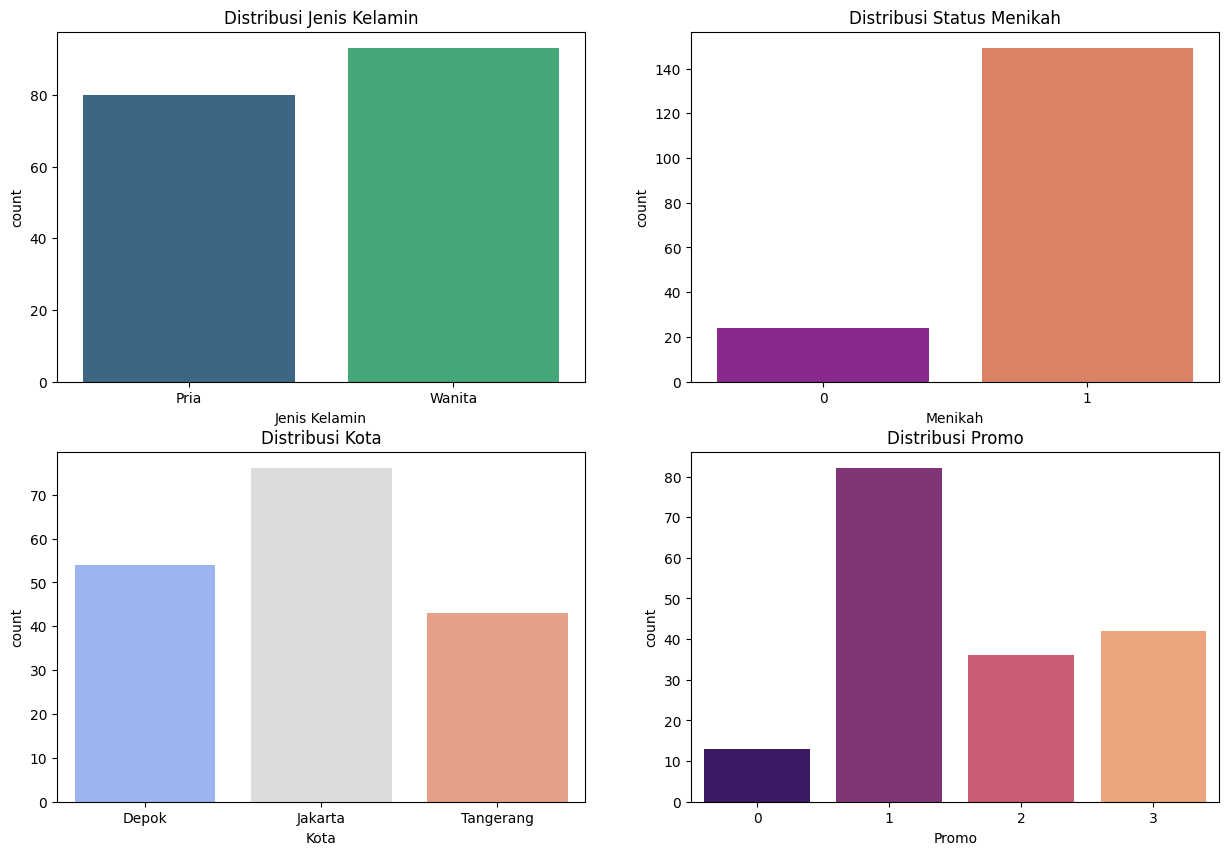

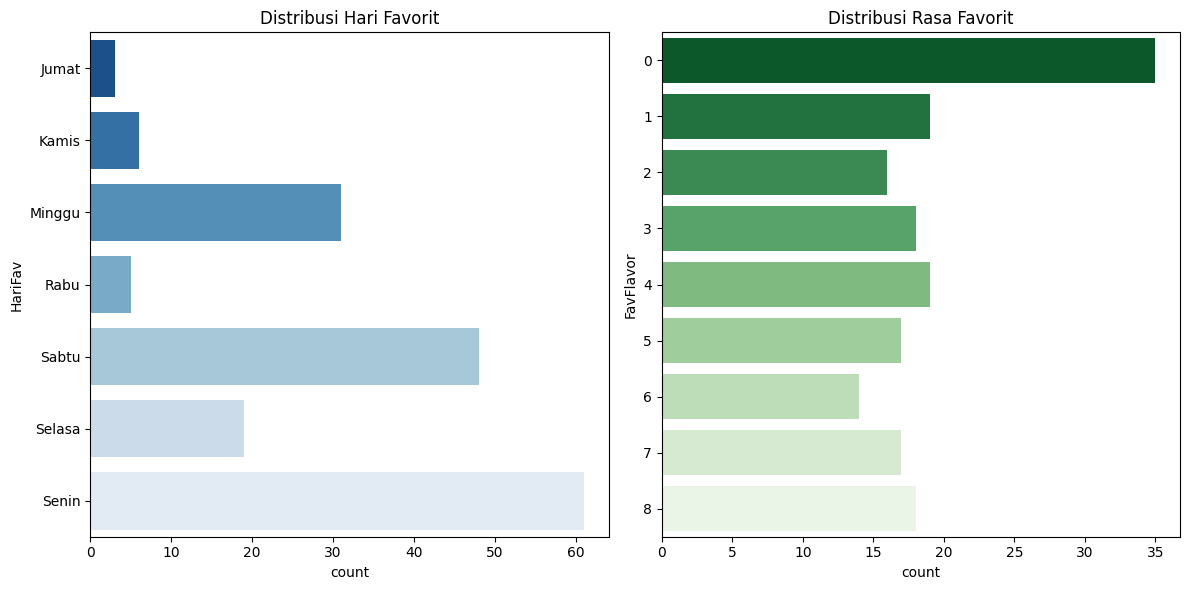

In [ ]:
# Bar Chart untuk Jenis Kelamin, Menikah, Kota, dan Promo
plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 1)
sns.countplot(x='Jenis Kelamin', data=data, palette='viridis')
plt.title('Distribusi Jenis Kelamin')

plt.subplot(2, 2, 2)
sns.countplot(x='Menikah', data=data, palette='plasma')
plt.title('Distribusi Status Menikah')

plt.subplot(2, 2, 3)
sns.countplot(x='Kota', data=data, palette='coolwarm')
plt.title('Distribusi Kota')

plt.subplot(2, 2, 4)
sns.countplot(x='Promo', data=data, palette='magma')
plt.title('Distribusi Promo')

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.countplot(y='HariFav', data=data, palette='Blues_r')
plt.title('Distribusi Hari Favorit')

plt.subplot(1, 2, 2)
sns.countplot(y='FavFlavor', data=data, palette='Greens_r')
plt.title('Distribusi Rasa Favorit')

plt.tight_layout()
plt.show()

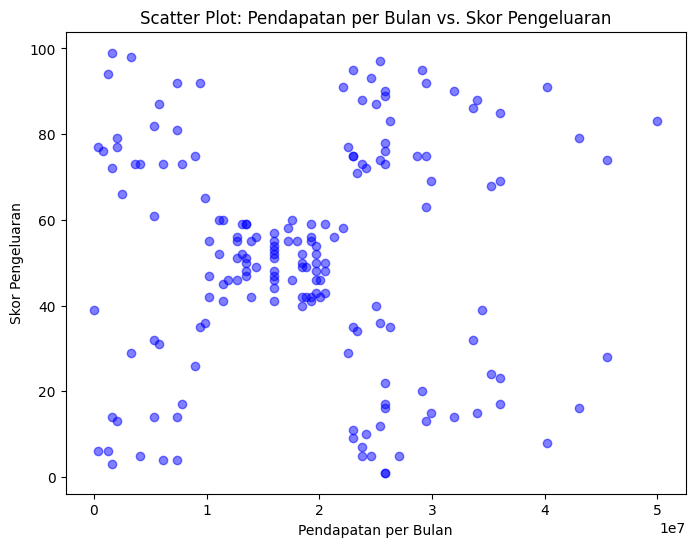

In [ ]:
#Scatter Plot untuk melihat hubungan antara Pendapatan-per-bulan dan skor-pengeluaran
plt.figure(figsize=(8, 6))
plt.scatter(data['Pendapatan-per-bulan'], data['skor-pengeluaran'], alpha=0.5, c='blue')
plt.title('Scatter Plot: Pendapatan per Bulan vs. Skor Pengeluaran')
plt.xlabel('Pendapatan per Bulan')
plt.ylabel('Skor Pengeluaran')
plt.show()

In [ ]:
data1 = data.copy()
data1

,Jenis Kelamin,Umur,Pendapatan-per-bulan,skor-pengeluaran,Menikah,Kota,Promo,HariFav,FavFlavor
0,Wanita,49,13114754,52,1,Jakarta,1,Sabtu,2
1,Wanita,32,33606557,86,1,Depok,1,Minggu,6
2,Pria,51,15983606,41,1,Jakarta,2,Minggu,3
3,Pria,19,12704918,55,0,Jakarta,1,Rabu,7
4,Wanita,38,20081967,42,1,Jakarta,2,Senin,8
...,...,...,...,...,...,...,...,...,...
195,Pria,31,4098360,73,1,Depok,1,Senin,0
196,Pria,57,15983606,51,1,Jakarta,1,Minggu,5
197,Wanita,35,43032786,79,1,Depok,1,Senin,7
198,Wanita,23,1229508,94,1,Depok,0,Selasa,0


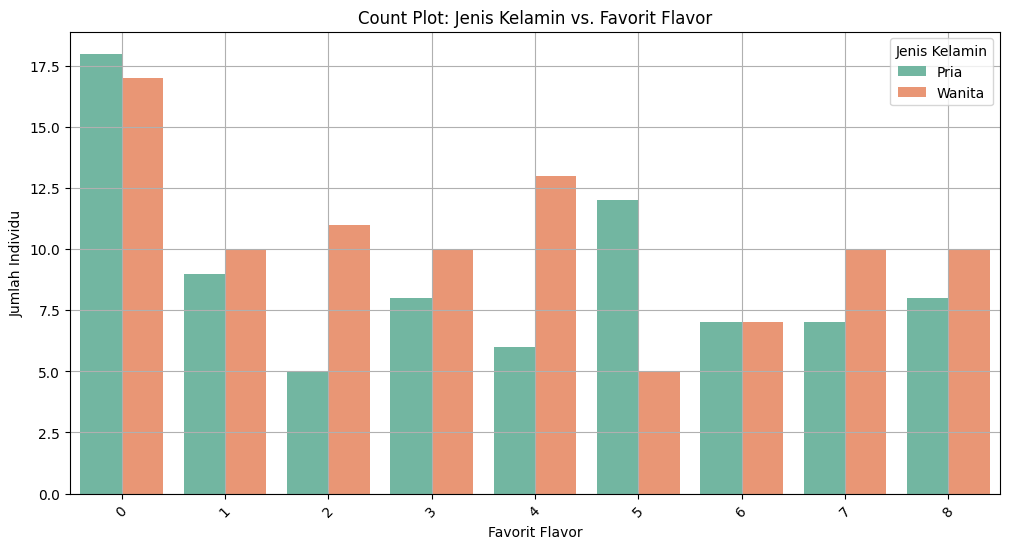

In [ ]:
# Count Plot untuk menunjukkan hubungan antara Jenis Kelamin dan FavFlavor
plt.figure(figsize=(12, 6))
sns.countplot(data=data1, x='FavFlavor', hue='Jenis Kelamin', palette='Set2')
plt.title('Count Plot: Jenis Kelamin vs. Favorit Flavor')
plt.xlabel('Favorit Flavor')
plt.ylabel('Jumlah Individu')
plt.legend(title='Jenis Kelamin')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

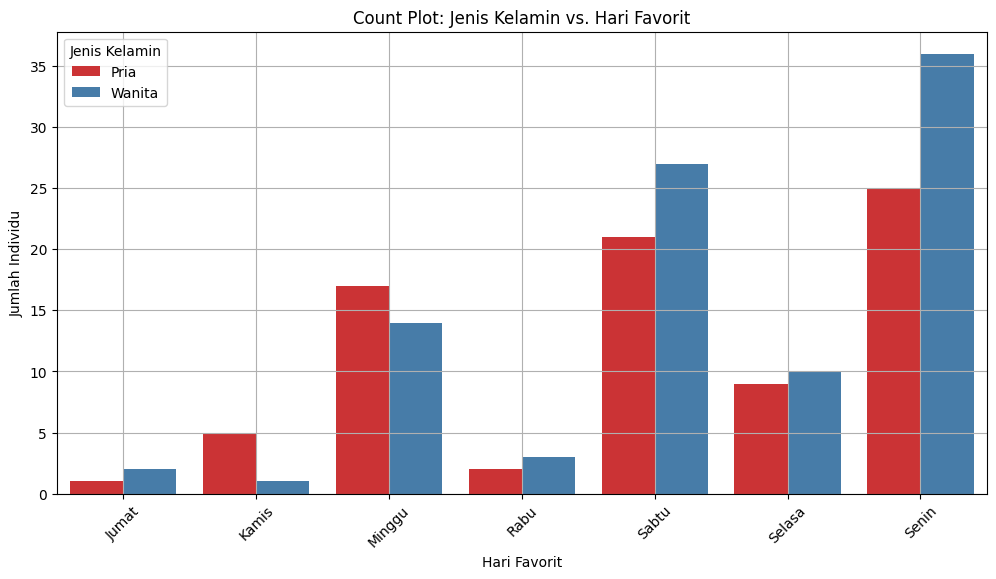

In [ ]:
# Count Plot untuk menunjukkan hubungan antara Jenis Kelamin dan FavFlavor
plt.figure(figsize=(12, 6))
sns.countplot(data=data1, x='HariFav', hue='Jenis Kelamin', palette='Set1')
plt.title('Count Plot: Jenis Kelamin vs. Hari Favorit')
plt.xlabel('Hari Favorit')
plt.ylabel('Jumlah Individu')
plt.legend(title='Jenis Kelamin')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

<ipython-input-53-b7c015563ffe>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  heatmap_data = data1.groupby(['HariFav', 'FavFlavor']).size().unstack(fill_value=0)


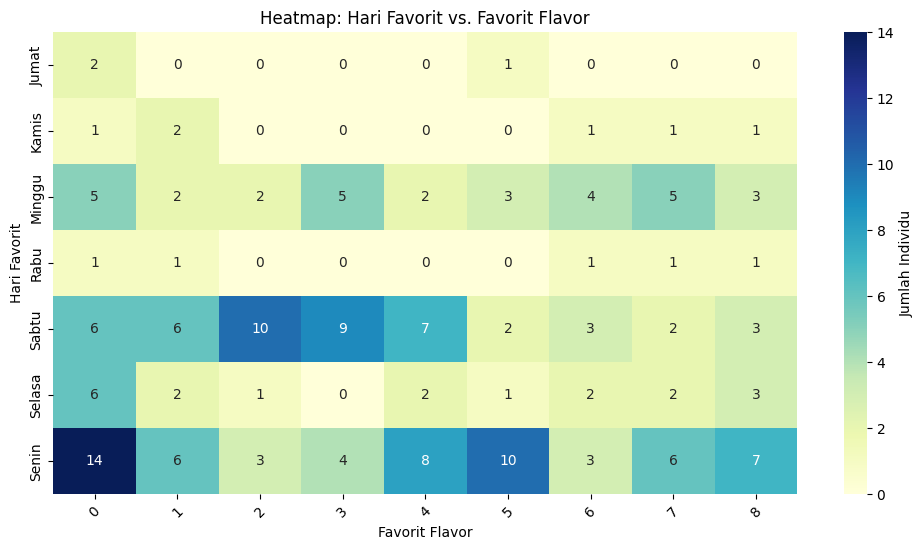

In [ ]:
# Menghitung frekuensi kombinasi HariFav dan FavFlavor
heatmap_data = data1.groupby(['HariFav', 'FavFlavor']).size().unstack(fill_value=0)

# Membuat Heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, annot=True, fmt='d', cmap='YlGnBu', cbar_kws={'label': 'Jumlah Individu'})
plt.title('Heatmap: Hari Favorit vs. Favorit Flavor')
plt.xlabel('Favorit Flavor')
plt.ylabel('Hari Favorit')
plt.xticks(rotation=45)  # Memutar label sumbu x agar lebih mudah dibaca
plt.show()

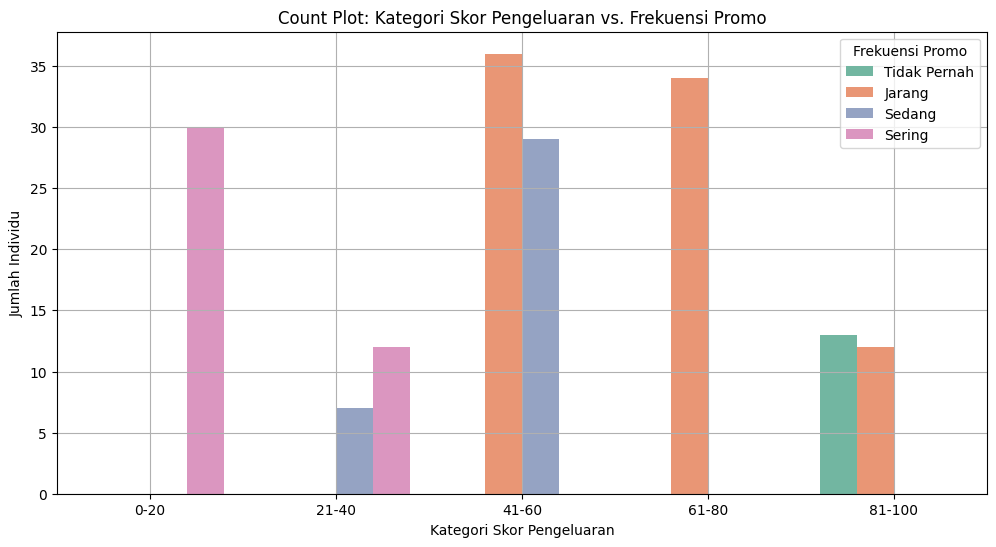

In [ ]:
# Mengganti kode promo dengan deskripsi yang lebih jelas
data1['Promo Deskripsi'] = data1['Promo'].map({0: 'Tidak Pernah', 1: 'Jarang', 2: 'Sedang', 3: 'Sering'})

# Mengategorikan skor pengeluaran ke dalam kelompok
bins = [0, 20, 40, 60, 80, 100]  # Misalkan kita membagi skor pengeluaran dalam bin ini
labels = ['0-20', '21-40', '41-60', '61-80', '81-100']
data1['Skor Kategori'] = pd.cut(data1['skor-pengeluaran'], bins=bins, labels=labels, right=False)

# Count Plot untuk menunjukkan hubungan antara kategori Skor Pengeluaran dan Promo
plt.figure(figsize=(12, 6))
sns.countplot(data=data1, x='Skor Kategori', hue='Promo Deskripsi', palette='Set2')
plt.title('Count Plot: Kategori Skor Pengeluaran vs. Frekuensi Promo')
plt.xlabel('Kategori Skor Pengeluaran')
plt.ylabel('Jumlah Individu')
plt.legend(title='Frekuensi Promo')
plt.grid(True)
plt.show()

<ipython-input-55-744f64dcddf4>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  heatmap_data = data1.groupby(['Promo', 'Menikah']).size().unstack(fill_value=0)


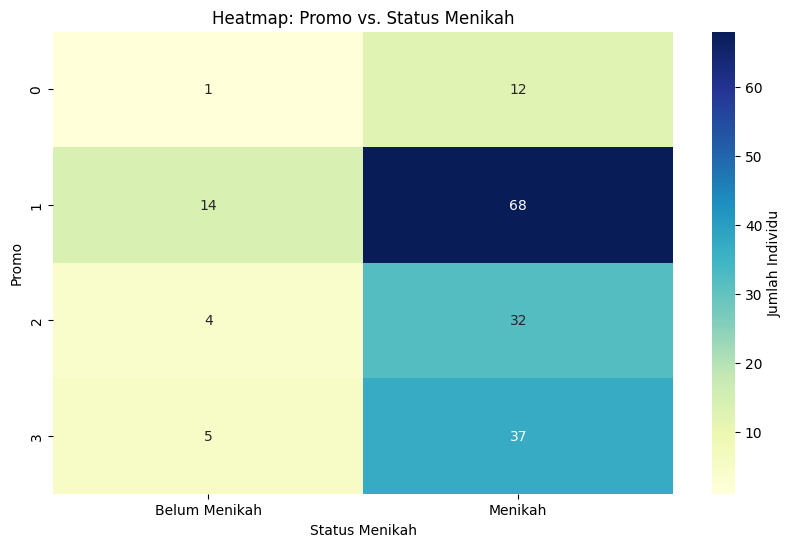

In [ ]:
# Menghitung frekuensi kombinasi Promo dan Menikah
heatmap_data = data1.groupby(['Promo', 'Menikah']).size().unstack(fill_value=0)

# Membuat Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, fmt='d', cmap='YlGnBu', cbar_kws={'label': 'Jumlah Individu'})
plt.title('Heatmap: Promo vs. Status Menikah')
plt.xlabel('Status Menikah')
plt.ylabel('Promo')
plt.xticks(ticks=[0.5, 1.5], labels=['Belum Menikah', 'Menikah'])  # Menambahkan label yang jelas
plt.show()

<ipython-input-56-b41951142ab3>:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  heatmap_data = data1.groupby(['Menikah', 'Pengeluaran Kategori']).size().unstack(fill_value=0)


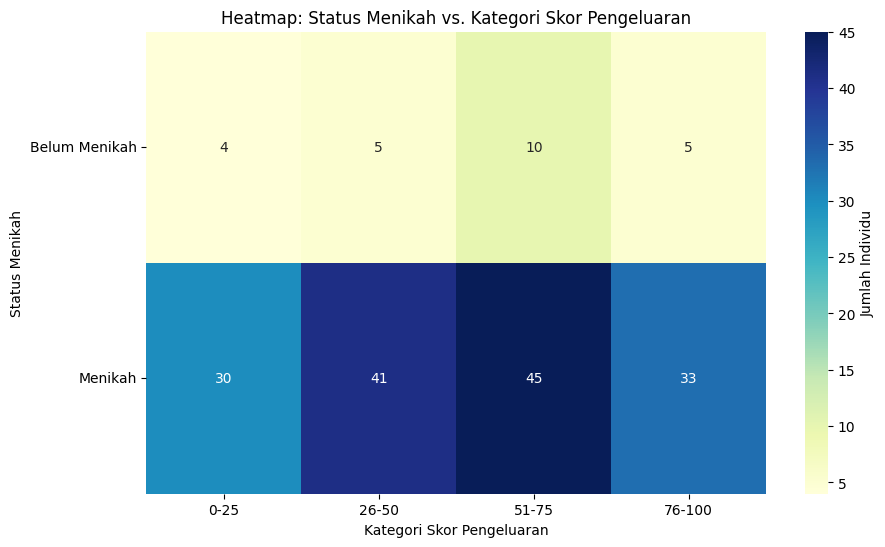

In [ ]:
#Mengategorikan Skor Pengeluaran ke dalam kelompok (bins)
bins = [0, 25, 50, 75, 100]  # Misalnya, kita membagi skor pengeluaran dalam bin ini
labels = ['0-25', '26-50', '51-75', '76-100']
data1['Pengeluaran Kategori'] = pd.cut(data['skor-pengeluaran'], bins=bins, labels=labels, right=False)

# Menghitung frekuensi kombinasi Menikah dan Pengeluaran Kategori
heatmap_data = data1.groupby(['Menikah', 'Pengeluaran Kategori']).size().unstack(fill_value=0)

# Membuat Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, fmt='d', cmap='YlGnBu', cbar_kws={'label': 'Jumlah Individu'})
plt.title('Heatmap: Status Menikah vs. Kategori Skor Pengeluaran')
plt.xlabel('Kategori Skor Pengeluaran')
plt.ylabel('Status Menikah')
plt.xticks(ticks=[0.5, 1.5, 2.5, 3.5], labels=labels)  # Menambahkan label yang jelas
plt.yticks(ticks=[0.5, 1.5], labels=['Belum Menikah', 'Menikah'], rotation=0)  # Menambahkan label pada sumbu y
plt.show()

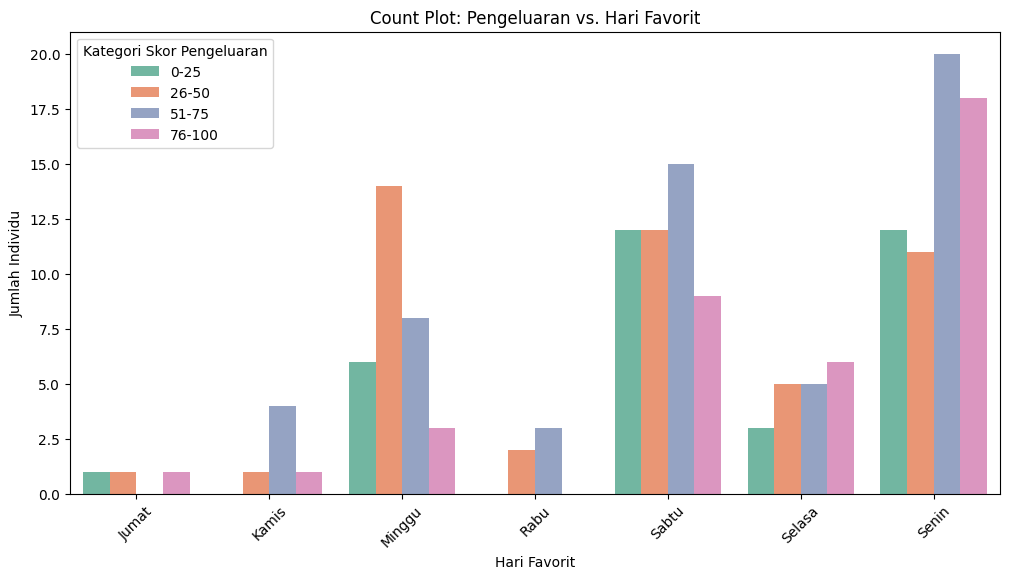

In [ ]:
# Mengategorikan Skor Pengeluaran ke dalam kelompok (bins)
bins = [0, 25, 50, 75, 100]  # Misalnya, kita membagi skor pengeluaran dalam bin ini
labels = ['0-25', '26-50', '51-75', '76-100']
data1['Pengeluaran Kategori'] = pd.cut(data['skor-pengeluaran'], bins=bins, labels=labels, right=False)

# Membuat Count Plot
plt.figure(figsize=(12, 6))
sns.countplot(data=data1, x='HariFav', hue='Pengeluaran Kategori', palette='Set2')
plt.title('Count Plot: Pengeluaran vs. Hari Favorit')
plt.xlabel('Hari Favorit')
plt.ylabel('Jumlah Individu')
plt.legend(title='Kategori Skor Pengeluaran')
plt.xticks(rotation=45)  # Memutar label hari agar lebih mudah dibaca
plt.show()

### Statistik Deskriptif

In [ ]:
data

,Jenis Kelamin,Umur,Pendapatan-per-bulan,skor-pengeluaran,Menikah,Kota,Promo,HariFav,FavFlavor
0,Wanita,49,13114754,52,1,Jakarta,1,Sabtu,2
1,Wanita,32,33606557,86,1,Depok,1,Minggu,6
2,Pria,51,15983606,41,1,Jakarta,2,Minggu,3
3,Pria,19,12704918,55,0,Jakarta,1,Rabu,7
4,Wanita,38,20081967,42,1,Jakarta,2,Senin,8
...,...,...,...,...,...,...,...,...,...
195,Pria,31,4098360,73,1,Depok,1,Senin,0
196,Pria,57,15983606,51,1,Jakarta,1,Minggu,5
197,Wanita,35,43032786,79,1,Depok,1,Senin,7
198,Wanita,23,1229508,94,1,Depok,0,Selasa,0


In [ ]:
 # Melihat statistika deskriptif setelah data bersih
 data.describe(include='all')

,Jenis Kelamin,Umur,Pendapatan-per-bulan,skor-pengeluaran,Menikah,Kota,Promo,HariFav,FavFlavor
count,173,173.000000,1.730000e+02,173.000000,173.0,173,173.0,173,173.0
unique,2,NaN,NaN,NaN,2.0,3,4.0,7,9.0
top,Wanita,NaN,NaN,NaN,1.0,Jakarta,1.0,Senin,0.0
freq,93,NaN,NaN,NaN,149.0,76,82.0,61,35.0
mean,NaN,37.179191,1.864636e+07,50.884393,NaN,NaN,NaN,NaN,NaN
std,NaN,12.023099,1.058813e+07,25.969984,NaN,NaN,NaN,NaN,NaN
min,NaN,18.000000,0.000000e+00,1.000000,NaN,NaN,NaN,NaN,NaN
25%,NaN,27.000000,1.106557e+07,35.000000,NaN,NaN,NaN,NaN,NaN
50%,NaN,36.000000,1.885246e+07,51.000000,NaN,NaN,NaN,NaN,NaN
75%,NaN,47.000000,2.540984e+07,73.000000,NaN,NaN,NaN,NaN,NaN


## **Customer Segmentation**

### Normalisasi Data Numerik

In [ ]:
# Melakukan normalisasi data
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Pilih hanya kolom numerik untuk dilakukan scaling
data_numerik = ['Umur', 'Pendapatan-per-bulan', 'skor-pengeluaran']
print('Statistik sebelum Standarisasi\n')
print(data[data_numerik ].describe().round(1))

# Inisialisasi MinMaxScaler
std = StandardScaler()

# Lakukan scaling pada data numerik
data_std = std.fit_transform(data[data_numerik])

# Konversi hasil scaling menjadi DataFrame pandas dengan kolom yang sama
data_std = pd.DataFrame(data = data_std, index= data.index, columns=data[data_numerik].columns)

# Menampilkan contoh isi data dan summary statistik
print('\nHasil Standarisasi\n')
print(data_std.head())

print('\nStatistik Hasil Standarisasi\n')
print(data_std.describe().round(0))

Statistik sebelum Standarisasi

        Umur  Pendapatan-per-bulan  skor-pengeluaran
count  173.0                 173.0             173.0
mean    37.2            18646356.0              50.9
std     12.0            10588129.8              26.0
min     18.0                   0.0               1.0
25%     27.0            11065573.0              35.0
50%     36.0            18852459.0              51.0
75%     47.0            25409836.0              73.0
max     60.0            50000000.0              99.0

Hasil Standarisasi

       Umur  Pendapatan-per-bulan  skor-pengeluaran
0  0.986029             -0.523951          0.043082
1 -0.432020              1.417023          1.356086
2  1.152858             -0.252214         -0.381713
3 -1.516411             -0.562770          0.158936
4  0.068468              0.135980         -0.343095

Statistik Hasil Standarisasi

        Umur  Pendapatan-per-bulan  skor-pengeluaran
count  173.0                 173.0             173.0
mean     0.0         

In [ ]:
# Statistika deskriptif hasil normalisasi data
data_std.describe(include='all')

,Umur,Pendapatan-per-bulan,skor-pengeluaran
count,1.730000e+02,1.730000e+02,1.730000e+02
mean,2.130601e-16,7.444270e-17,1.540194e-17
std,1.002903e+00,1.002903e+00,1.002903e+00
min,-1.599826e+00,-1.766174e+00,-1.926424e+00
25%,-8.490938e-01,-7.180483e-01,-6.134198e-01
50%,-9.836180e-02,1.952198e-02,4.464482e-03
75%,8.191995e-01,6.406337e-01,8.540553e-01
max,1.903590e+00,2.969803e+00,1.858117e+00


### Konversi Data Kategorik dengan label encode

In [ ]:
data_kategorik = ['Jenis Kelamin', 'Menikah', 'Kota', 'HariFav', 'FavFlavor', 'Promo']
# Membuat salinan data frame
data_encode = data[data_kategorik].copy()

# Melakukan labelEncoder untuk semua kolom kategorik
for col in data_kategorik:
    data_encode[col] = LabelEncoder().fit_transform(data_encode[col])

# Menampilkan data
data_encode

,Jenis Kelamin,Menikah,Kota,HariFav,FavFlavor,Promo
0,1,1,1,4,2,1
1,1,1,0,2,6,1
2,0,1,1,2,3,2
3,0,0,1,3,7,1
4,1,1,1,6,8,2
...,...,...,...,...,...,...
195,0,1,0,6,0,1
196,0,1,1,2,5,1
197,1,1,0,6,7,1
198,1,1,0,5,0,0


### Menggabungkan Data hasil Normalisasi daan Label Encode

In [ ]:
data_model = data_encode.merge(data_std, left_index = True, right_index=True, how = 'left')
data_model

,Jenis Kelamin,Menikah,Kota,HariFav,FavFlavor,Promo,Umur,Pendapatan-per-bulan,skor-pengeluaran
0,1,1,1,4,2,1,0.986029,-0.523951,0.043082
1,1,1,0,2,6,1,-0.432020,1.417023,1.356086
2,0,1,1,2,3,2,1.152858,-0.252214,-0.381713
3,0,0,1,3,7,1,-1.516411,-0.562770,0.158936
4,1,1,1,6,8,2,0.068468,0.135980,-0.343095
...,...,...,...,...,...,...,...,...,...
195,0,1,0,6,0,1,-0.515435,-1.377979,0.854055
196,0,1,1,2,5,1,1.653346,-0.252214,0.004464
197,1,1,0,6,7,1,-0.181776,2.309871,1.085762
198,1,1,0,5,0,0,-1.182752,-1.649716,1.665028


In [ ]:
data_model.info()

<class 'pandas.core.frame.DataFrame'>
Index: 173 entries, 0 to 199
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Jenis Kelamin         173 non-null    int64  
 1   Menikah               173 non-null    int64  
 2   Kota                  173 non-null    int64  
 3   HariFav               173 non-null    int64  
 4   FavFlavor             173 non-null    int64  
 5   Promo                 173 non-null    int64  
 6   Umur                  173 non-null    float64
 7   Pendapatan-per-bulan  173 non-null    float64
 8   skor-pengeluaran      173 non-null    float64
dtypes: float64(3), int64(6)
memory usage: 13.5 KB


### Elbow Method

In [ ]:
import warnings; warnings.simplefilter('ignore')
try:
  import google.colab; IN_COLAB = True
  print("Installing the required modules")
  !pip install scikit-learn-extra
  !wget https://raw.githubusercontent.com/taudataanalytics/Data-Mining--Penambangan-Data--Ganjil-2024/master/tau_unsup.py
except:
  IN_COLAB = False
  print("Running the code locally, please make sure all the python module versions agree with colab environment and all data/assets downloaded")


Installing the required modules
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 33.4 MB/s eta 0:00:00
--2024-10-18 14:35:50--  https://raw.githubusercontent.com/taudataanalytics/Data-Mining--Penambangan-Data--Ganjil-2024/master/tau_unsup.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 17387 (17K) [text/plain]
Saving to: ‘tau_unsup.py’

tau_unsup.py        100%[===================>]  16.98K  --.-KB/s    in 0s      

2024-10-18 14:35:50 (92.8 MB/s) - ‘tau_unsup.py’ saved [17387/17387]



In [ ]:
# Importing Modules
import warnings; warnings.simplefilter('ignore')
import tau_unsup as tau
from sklearn import cluster, datasets
from sklearn.metrics import silhouette_score as siluet
from sklearn.metrics.cluster import homogeneity_score as purity
from sklearn.metrics import normalized_mutual_info_score as NMI
import numpy as np, matplotlib.pyplot as plt, pandas as pd, seaborn as sns
from scipy.spatial import distance
from scipy.cluster.hierarchy import dendrogram, linkage
import scipy.spatial.distance
from sklearn_extra.cluster import KMedoids
from sklearn.ensemble import IsolationForest
sns.set(style="ticks", color_codes=True)
random_state = 99

Text(0.5, 1.0, 'Elbow curve')

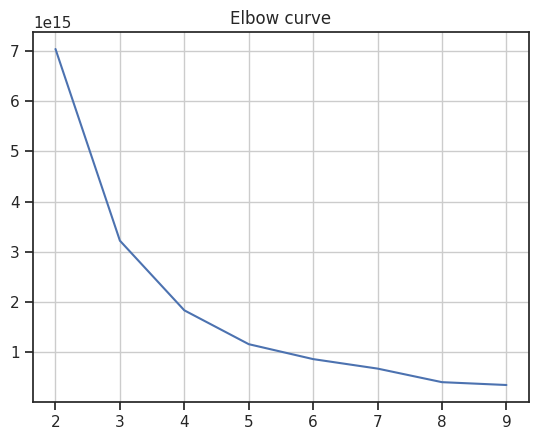

In [ ]:
distorsions, k1, kN = [], 2, 10
for k in range(k1, kN):
  kmeans = cluster.KMeans(n_clusters=k).fit(data[data_numerik])
  distorsions.append(kmeans.inertia_)

plt.plot(range(k1, kN), distorsions); plt.grid(True)
plt.title('Elbow curve')

Berdasarkan plot Elbow Method diatas, garis mengalami patahan yang membentuk elbow atau siku pada saat k = 3 4 6. Maka dengan menggunakan metode ini diperoleh k optimal pada saat berada di k = 4. Untuk menjadi pembanding, dapat dilakukan uji yang lainnya.

### K-Prototype

In [ ]:
!pip install kmodes

from kmodes.kmodes import KModes
from kmodes.kprototypes import KPrototypes
import pickle

In [ ]:
kproto = KPrototypes(n_clusters = 4, random_state = 75)
kproto.fit(data_model, categorical = [0,1,2,3])
C_kproto = kproto.predict(data_model, categorical = [0,1,2,3])
centroid_kp = kproto.cluster_centroids_

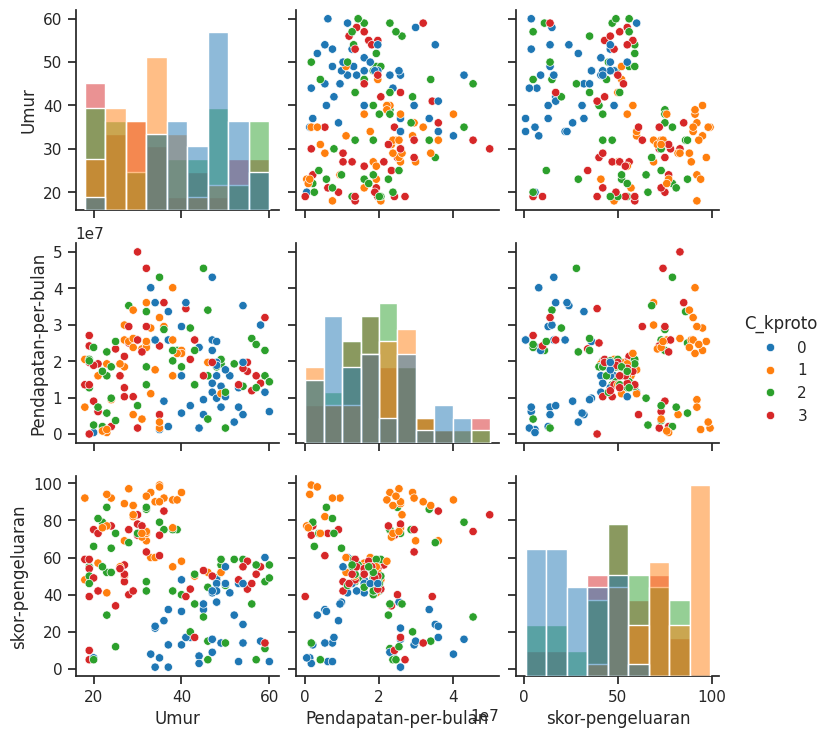

In [ ]:
data['C_kproto'] = C_kproto
g = sns.pairplot(data[['Umur','Pendapatan-per-bulan','skor-pengeluaran','C_kproto']], \
hue="C_kproto", diag_kind="hist", palette="tab10")

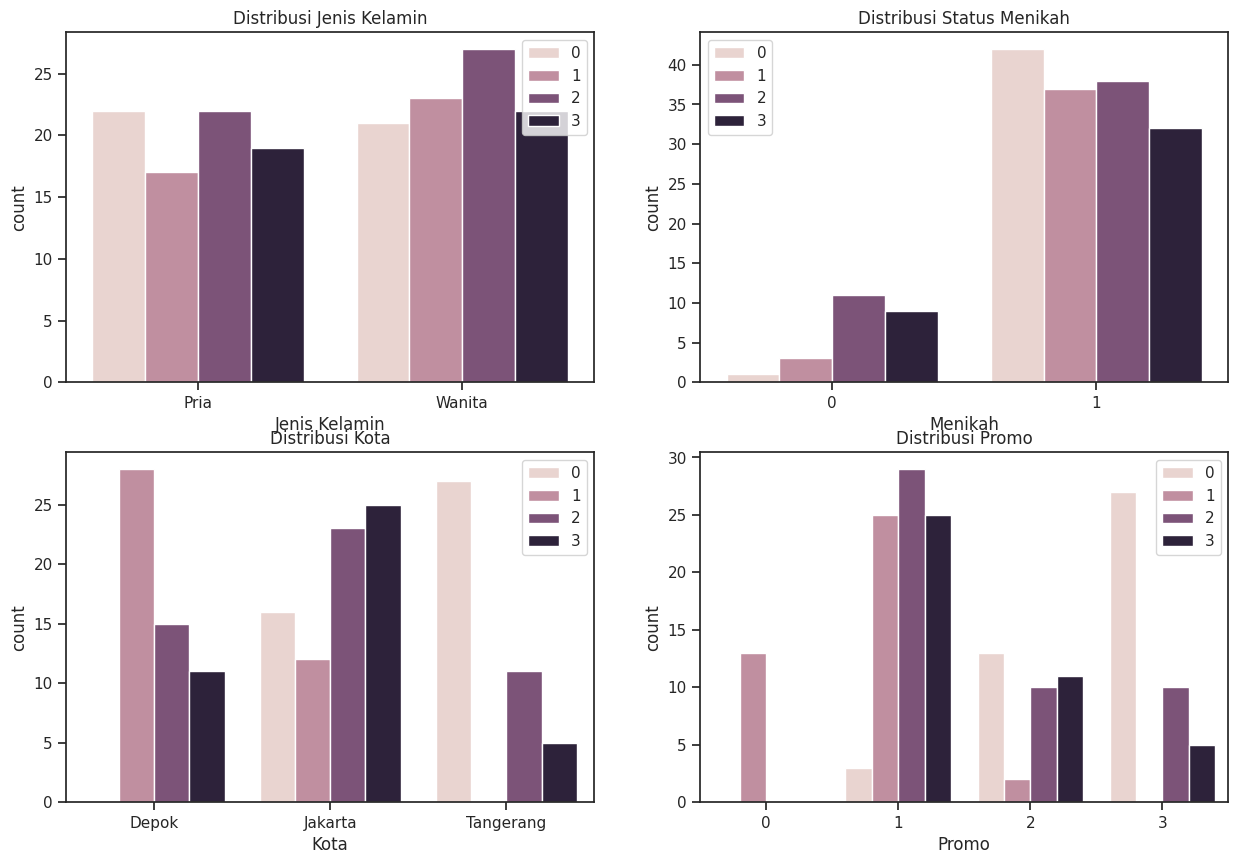

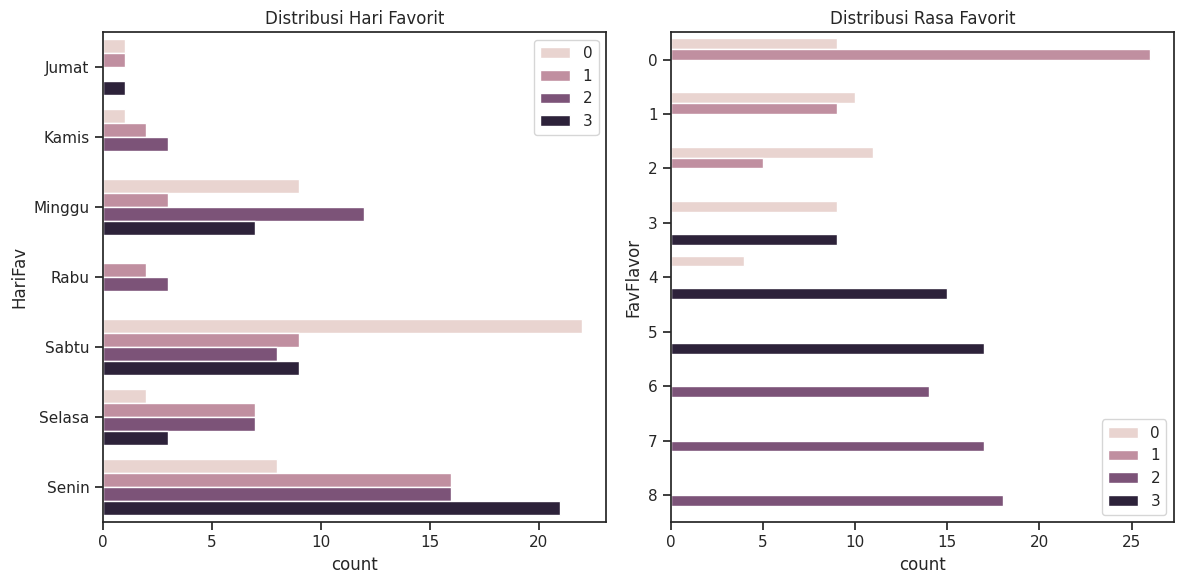

In [ ]:
# Bar Chart untuk Jenis Kelamin, Menikah, Kota, dan Promo
plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 1)
sns.countplot(x='Jenis Kelamin', data=data, hue = C_kproto)
plt.title('Distribusi Jenis Kelamin')

plt.subplot(2, 2, 2)
sns.countplot(x='Menikah', data=data, hue =C_kproto)
plt.title('Distribusi Status Menikah')

plt.subplot(2, 2, 3)
sns.countplot(x='Kota', data=data, hue =C_kproto)
plt.title('Distribusi Kota')

plt.subplot(2, 2, 4)
sns.countplot(x='Promo', data=data, hue =C_kproto)
plt.title('Distribusi Promo')

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.countplot(y='HariFav', data=data, hue =C_kproto)
plt.title('Distribusi Hari Favorit')

plt.subplot(1, 2, 2)
sns.countplot(y='FavFlavor', data=data, hue =C_kproto)
plt.title('Distribusi Rasa Favorit')

plt.tight_layout()
plt.show()

### K-means++

array([2, 0, 2, 2, 2, 3, 3, 1, 2, 2], dtype=int32)

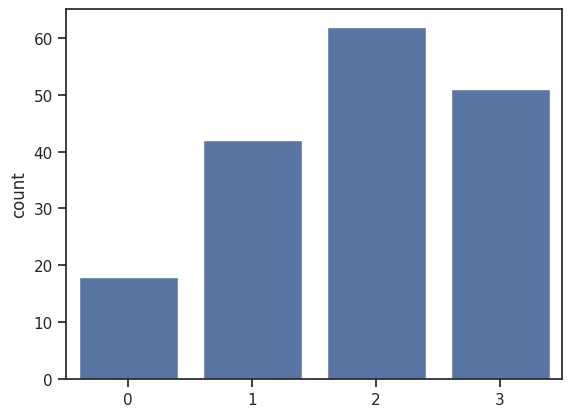

In [ ]:
k=4
kmPP = cluster.KMeans(n_clusters=k, init='k-means++')
kmPP.fit(data[data_numerik])
C_kmpp = kmPP.predict(data[data_numerik])
centroid_km = kmPP.cluster_centers_
sns.countplot(x=C_kmpp)
C_kmpp[:10]

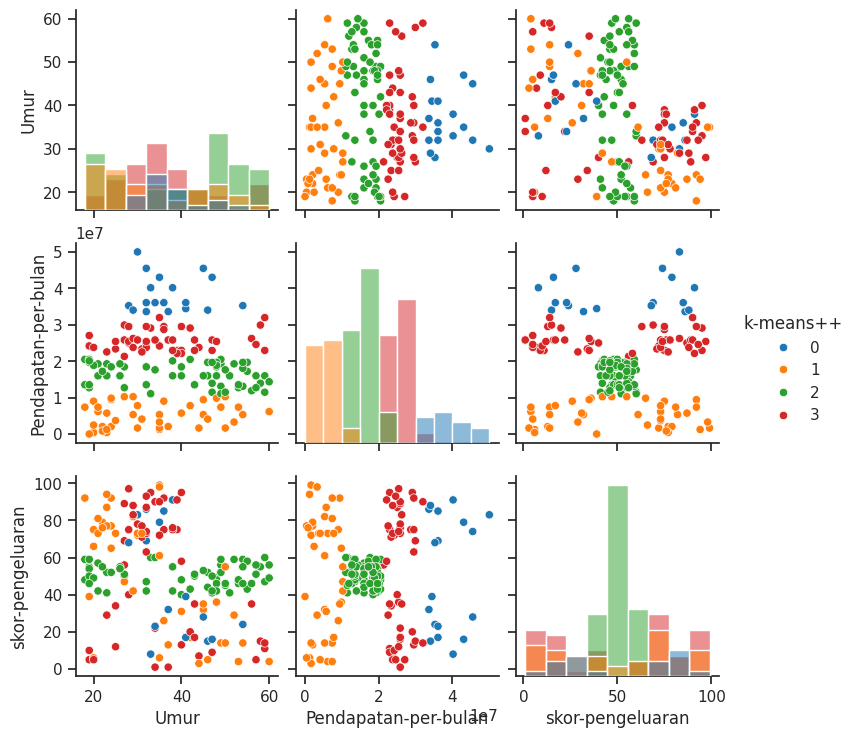

In [ ]:
data['k-means++'] = C_kmpp
g = sns.pairplot(data[['Umur','Pendapatan-per-bulan','skor-pengeluaran','k-means++']], \
hue="k-means++", diag_kind="hist", palette="tab10")

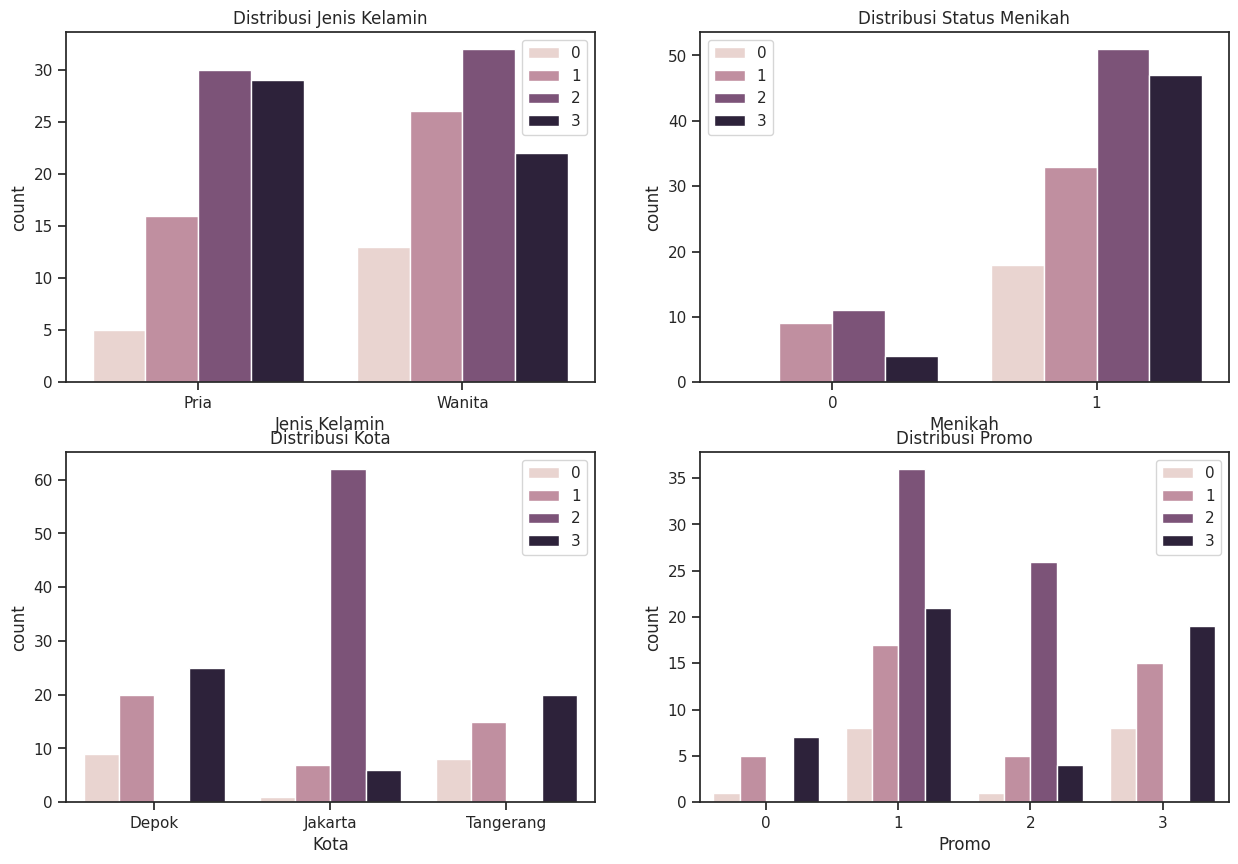

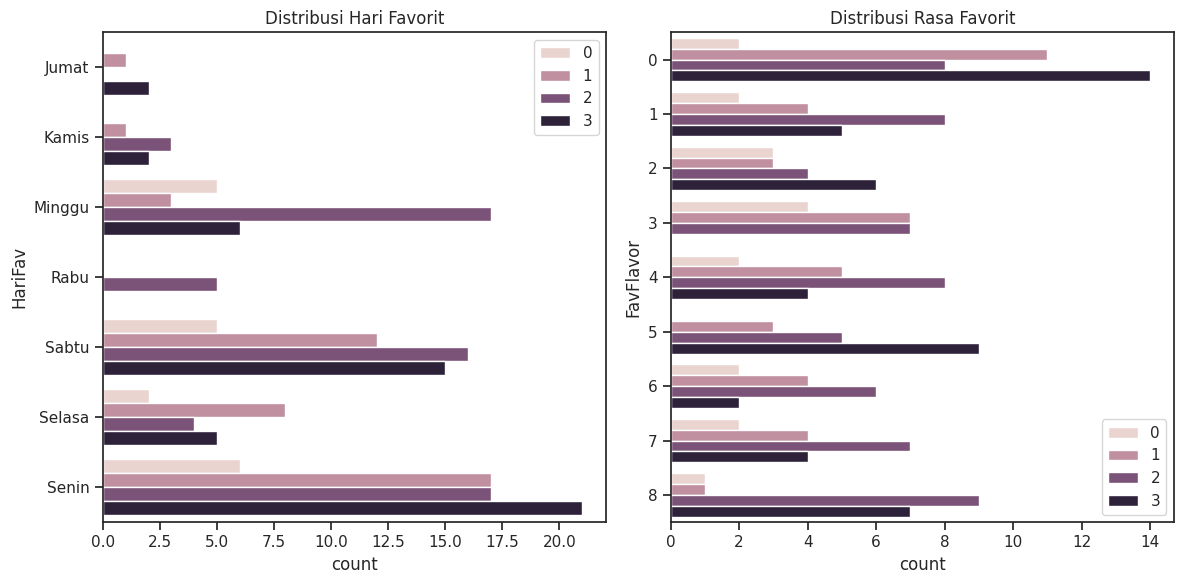

In [ ]:
# Bar Chart untuk Jenis Kelamin, Menikah, Kota, dan Promo
plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 1)
sns.countplot(x='Jenis Kelamin', data=data, hue = C_kmpp)
plt.title('Distribusi Jenis Kelamin')

plt.subplot(2, 2, 2)
sns.countplot(x='Menikah', data=data, hue =C_kmpp)
plt.title('Distribusi Status Menikah')

plt.subplot(2, 2, 3)
sns.countplot(x='Kota', data=data, hue =C_kmpp)
plt.title('Distribusi Kota')

plt.subplot(2, 2, 4)
sns.countplot(x='Promo', data=data, hue =C_kmpp)
plt.title('Distribusi Promo')

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.countplot(y='HariFav', data=data, hue =C_kmpp)
plt.title('Distribusi Hari Favorit')

plt.subplot(1, 2, 2)
sns.countplot(y='FavFlavor', data=data, hue =C_kmpp)
plt.title('Distribusi Rasa Favorit')

plt.tight_layout()
plt.show()

### Kmedoids

array([0, 3, 0, 0, 2, 2, 2, 1, 0, 0])

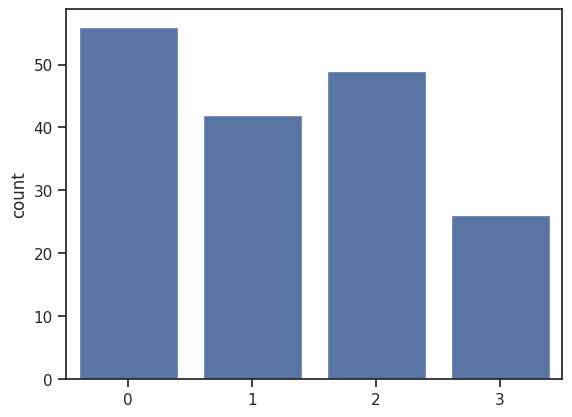

In [ ]:
kmedoids = KMedoids(n_clusters=4).fit(data[data_numerik])
C_medoid = kmedoids.predict(data[data_numerik])
centroid_med = kmedoids.cluster_centers_
sns.countplot(x=C_medoid)
C_medoid[:10]

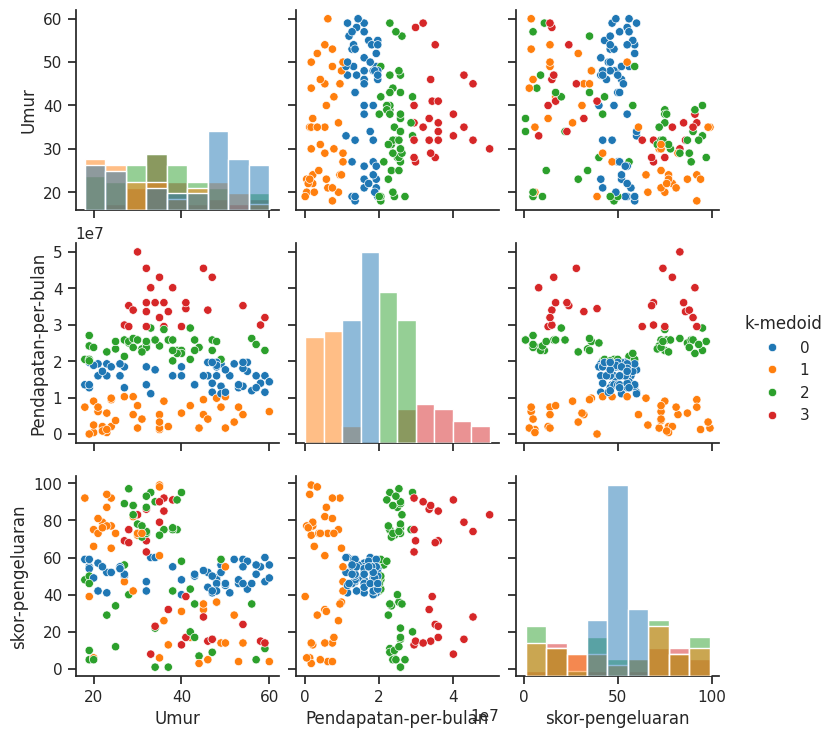

In [ ]:
data['k-medoid'] = C_medoid
# Plot the clustering result
g = sns.pairplot(data[['Umur','Pendapatan-per-bulan','skor-pengeluaran','k-medoid']], \
hue="k-medoid", diag_kind="hist", palette="tab10")

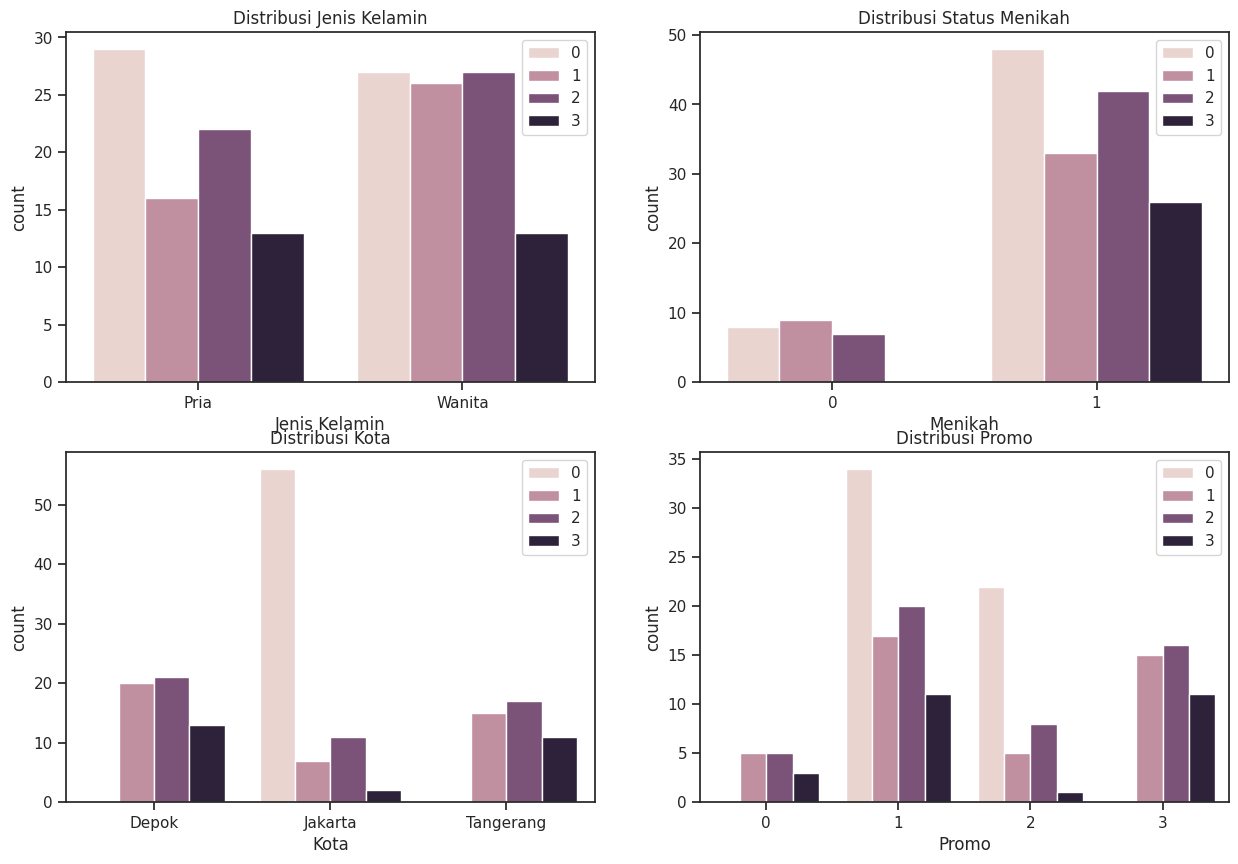

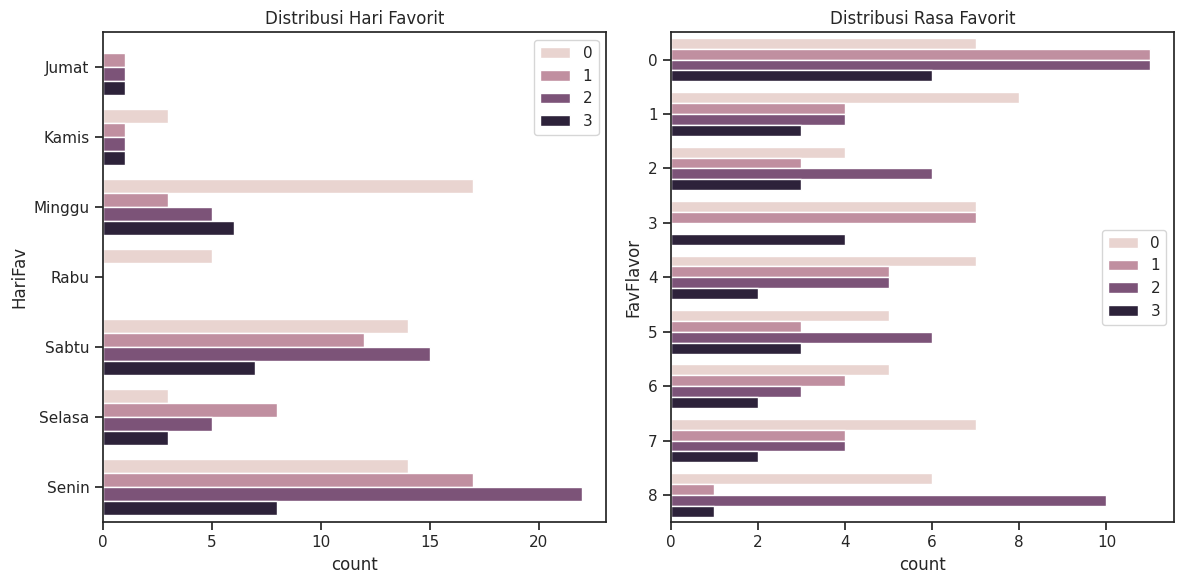

In [ ]:
# Bar Chart untuk Jenis Kelamin, Menikah, Kota, dan Promo
plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 1)
sns.countplot(x='Jenis Kelamin', data=data, hue = C_medoid)
plt.title('Distribusi Jenis Kelamin')

plt.subplot(2, 2, 2)
sns.countplot(x='Menikah', data=data, hue =C_medoid)
plt.title('Distribusi Status Menikah')

plt.subplot(2, 2, 3)
sns.countplot(x='Kota', data=data, hue =C_medoid)
plt.title('Distribusi Kota')

plt.subplot(2, 2, 4)
sns.countplot(x='Promo', data=data, hue =C_medoid)
plt.title('Distribusi Promo')

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.countplot(y='HariFav', data=data, hue =C_medoid)
plt.title('Distribusi Hari Favorit')

plt.subplot(1, 2, 2)
sns.countplot(y='FavFlavor', data=data, hue =C_medoid)
plt.title('Distribusi Rasa Favorit')

plt.tight_layout()
plt.show()

Perbandingan Plot Solusi KPrototype, K-Means++ dan K-Medoid

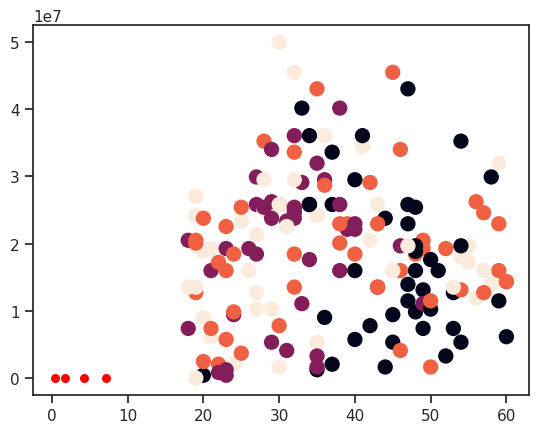

In [ ]:
#K-Prototype
fig, ax = plt.subplots()
ax.scatter(data[data_numerik].iloc[:,0], data[data_numerik].iloc[:,1], c=C_kproto, s=100) # s= size
ax.scatter(centroid_kp[:,0], centroid_kp[:,1], c="red", s=30) # Centroid k-Means "Red"
plt.show()

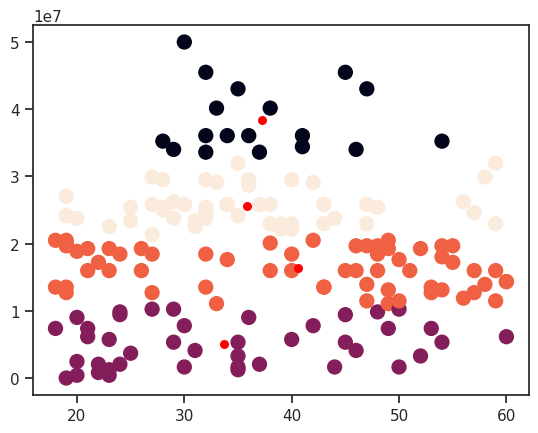

In [ ]:
#K-Means++
fig, ax = plt.subplots()
ax.scatter(data[data_numerik].iloc[:,0], data[data_numerik].iloc[:,1], c=C_kmpp, s=100) # s= size
ax.scatter(centroid_km[:,0], centroid_km[:,1], c="red", s=30) # Centroid k-Means "Red"
plt.show()

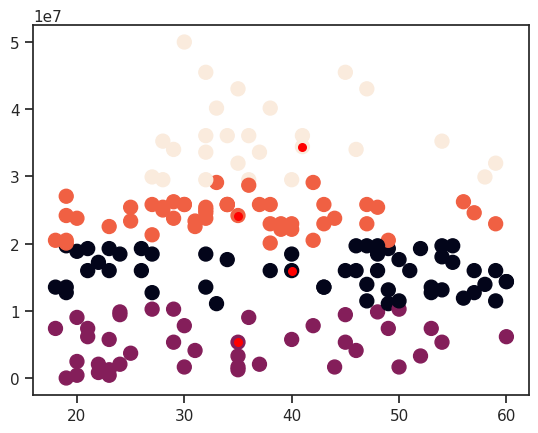

In [ ]:
#K-Medoid
fig, ax = plt.subplots()
ax.scatter(data[data_numerik].iloc[:,0], data[data_numerik].iloc[:,1], c=C_medoid, s=100)
ax.scatter(centroid_med[:,0], centroid_med[:,1], c="red", s=30) # Centroid k-Medoid "Green"
plt.show()

Dapat dilihat bahwa berdasarkan perbandingan plot hasil clustering, K-Medoid dan K-Means++ terlihat menghasilkan clustering yang lebih baik dibandingkan dengan k-prototype. Namun, karena data outlier tidak signifikan dapat digunakan clustering k-means++. Kesimpulan ini perlu dikonfirmasi dengan analisis lebih lanjut menggunakan metrik evaluasi dan pemahaman yang lebih dalam tentang karakteristik data dan tujuan clustering.

In [ ]:
data

,Jenis Kelamin,Umur,Pendapatan-per-bulan,skor-pengeluaran,Menikah,Kota,Promo,HariFav,FavFlavor,C_kproto,k-means++,k-medoid
0,Wanita,49,13114754,52,1,Jakarta,1,Sabtu,2,0,2,0
1,Wanita,32,33606557,86,1,Depok,1,Minggu,6,2,0,3
2,Pria,51,15983606,41,1,Jakarta,2,Minggu,3,0,2,0
3,Pria,19,12704918,55,0,Jakarta,1,Rabu,7,2,2,0
4,Wanita,38,20081967,42,1,Jakarta,2,Senin,8,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...
195,Pria,31,4098360,73,1,Depok,1,Senin,0,1,1,1
196,Pria,57,15983606,51,1,Jakarta,1,Minggu,5,3,2,0
197,Wanita,35,43032786,79,1,Depok,1,Senin,7,2,0,3
198,Wanita,23,1229508,94,1,Depok,0,Selasa,0,1,1,1


### Tipe-tipe Pelanggan

In [ ]:
data_final = data.copy()
data_final['Tipe Pelanggan'] = C_kmpp
data_final.head(15)

,Jenis Kelamin,Umur,Pendapatan-per-bulan,skor-pengeluaran,Menikah,Kota,Promo,HariFav,FavFlavor,C_kproto,k-means++,k-medoid,Tipe Pelanggan
0,Wanita,49,13114754,52,1,Jakarta,1,Sabtu,2,0,2,0,2
1,Wanita,32,33606557,86,1,Depok,1,Minggu,6,2,0,3,0
2,Pria,51,15983606,41,1,Jakarta,2,Minggu,3,0,2,0,2
3,Pria,19,12704918,55,0,Jakarta,1,Rabu,7,2,2,0,2
4,Wanita,38,20081967,42,1,Jakarta,2,Senin,8,2,2,2,2
5,Wanita,33,29098360,95,1,Depok,0,Senin,0,1,3,2,3
6,Pria,27,21311475,56,1,Jakarta,1,Senin,5,3,3,2,3
7,Wanita,24,2049180,77,1,Depok,1,Senin,3,3,1,1,1
8,Wanita,32,13524590,47,1,Jakarta,2,Selasa,6,2,2,0,2
9,Wanita,21,19262295,42,1,Jakarta,2,Senin,4,3,2,0,2


In [ ]:
# Mapping nama kolom
data_final['Tipe Pelanggan'] = data_final['Tipe Pelanggan'].map({
0: 'Tipe 1',
1: 'Tipe 2',
2: 'Tipe 3',
3: 'Tipe 4',
})
data_final['Tipe Pelanggan']= data_final['Tipe Pelanggan'].astype('category')
data_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 173 entries, 0 to 199
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   Jenis Kelamin         173 non-null    category
 1   Umur                  173 non-null    int64   
 2   Pendapatan-per-bulan  173 non-null    int64   
 3   skor-pengeluaran      173 non-null    int64   
 4   Menikah               173 non-null    category
 5   Kota                  173 non-null    category
 6   Promo                 173 non-null    category
 7   HariFav               173 non-null    category
 8   FavFlavor             173 non-null    category
 9   C_kproto              173 non-null    uint16  
 10  k-means++             173 non-null    int32   
 11  k-medoid              173 non-null    int64   
 12  Tipe Pelanggan        173 non-null    category
dtypes: category(7), int32(1), int64(4), uint16(1)
memory usage: 10.4 KB


In [ ]:
# Mengelompokkan data berdasarkan 'Tipe Pelanggan'
grouped_data = data_final.groupby('Tipe Pelanggan')

# Membuat list of DataFrames untuk setiap kelompok
list_of_dfs = [grouped_data.get_group(x) for x in grouped_data.groups]

# Menggabungkan list of DataFrames menjadi satu DataFrame
result_df = pd.concat(list_of_dfs, keys=grouped_data.groups.keys())
result_df

Jenis Kelamin  Umur  Pendapatan-per-bulan  skor-pengeluaran  \
Tipe 1 1          Wanita    32              33606557                86   
       12           Pria    46              34016393                15   
       43         Wanita    37              33606557                32   
       44         Wanita    32              36065573                69   
       58         Wanita    41              34426229                39   
...                  ...   ...                   ...               ...   
Tipe 4 175          Pria    43              25819672                17   
       176          Pria    25              25409836                12   
       179          Pria    32              23770491                73   
       181        Wanita    32              25409836                74   
       192        Wanita    31              22540983                77   

           Menikah       Kota Promo HariFav FavFlavor  C_kproto  k-means++  \
Tipe 1 1         1      Depok     1  Minggu         6         2          0   
       12        1  Tangerang     3  Selasa         7         2          0   
       43        1  Tangerang     3   Senin         2         0          0   
       44        1      Depok     1   Sabtu         1         1          0   
       58        1    Jakarta     2  Minggu         4         3          0   
...            ...        ...   ...     ...       ...       ...        ...   
Tipe 4 175       1  Tangerang     3   Senin         5         3          3   
       176       1  Tangerang     3   Senin         8         2          3   
       179       1      Depok     1  Minggu         1         1          3   
       181       1      Depok     1   Sabtu         2         1          3   
       192       1      Depok     1   Senin         4         3          3   

            k-medoid Tipe Pelanggan  
Tipe 1 1           3         Tipe 1  
       12          3         Tipe 1  
       43          3         Tipe 1  
       44          3         Tipe 1  
       58          3         Tipe 1  
...              ...            ...  
Tipe 4 175         2         Tipe 4  
       176         2         Tipe 4  
       179         2         Tipe 4  
       181         2         Tipe 4  
       192         2         Tipe 4  

[173 rows x 13 columns]

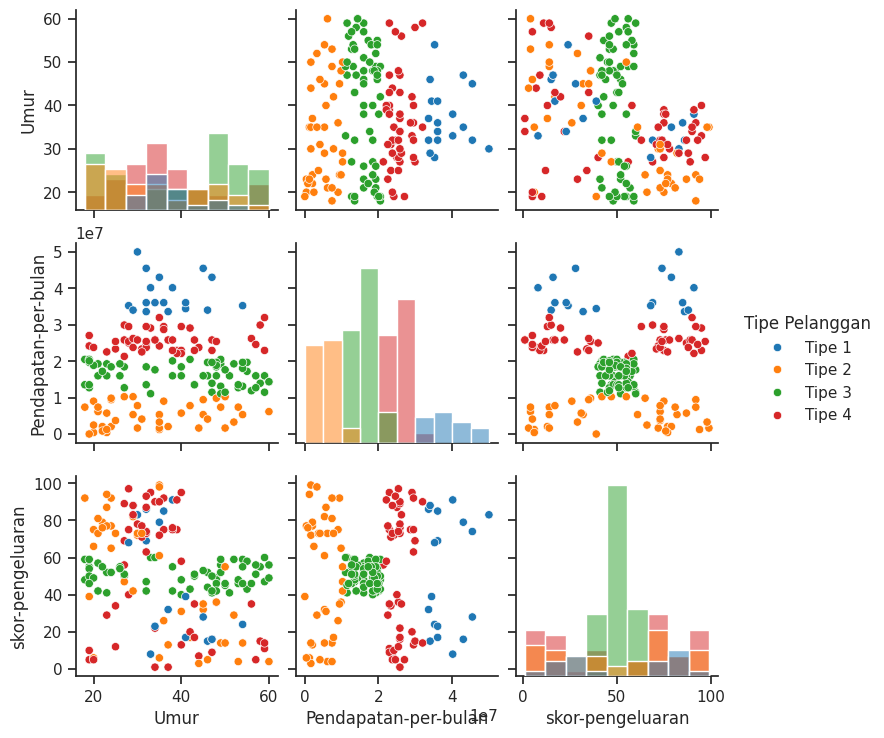

In [ ]:
g = sns.pairplot(data_final[['Umur','Pendapatan-per-bulan','skor-pengeluaran','Tipe Pelanggan']], \
hue="Tipe Pelanggan", diag_kind="hist", palette="tab10")

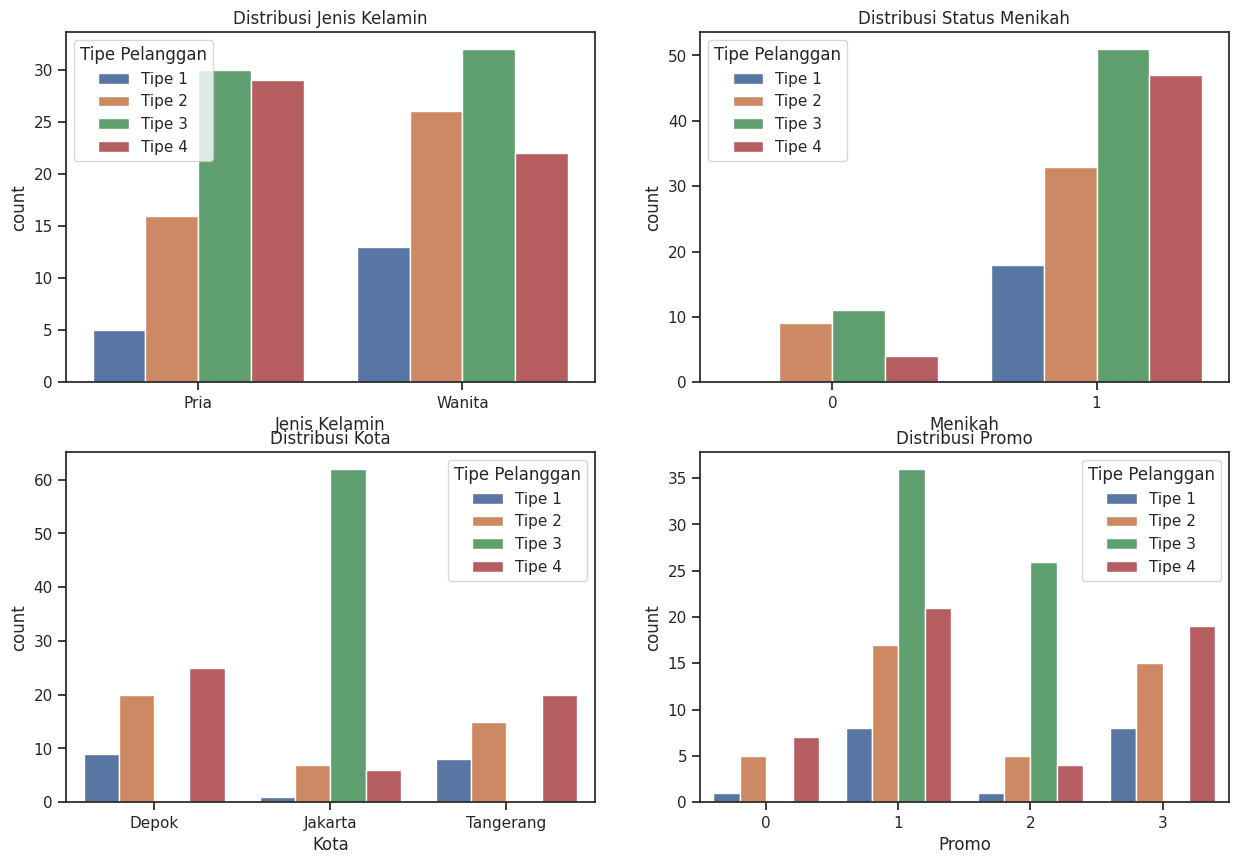

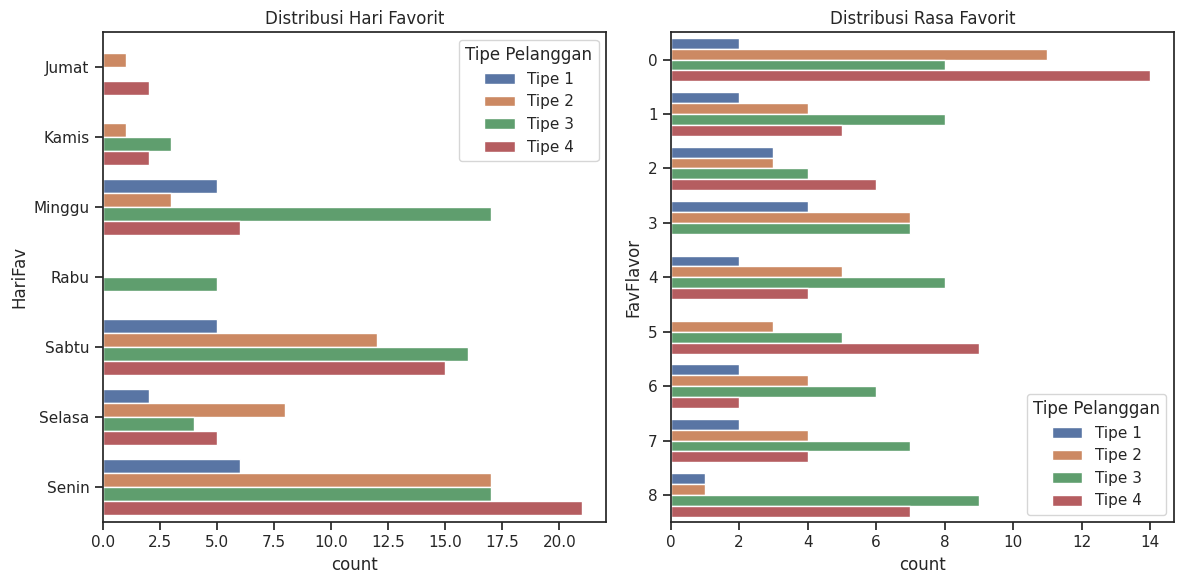

In [ ]:
# Bar Chart untuk Jenis Kelamin, Menikah, Kota, dan Promo
plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 1)
sns.countplot(x='Jenis Kelamin', data=data_final, hue = 'Tipe Pelanggan')
plt.title('Distribusi Jenis Kelamin')

plt.subplot(2, 2, 2)
sns.countplot(x='Menikah', data=data_final, hue ='Tipe Pelanggan')
plt.title('Distribusi Status Menikah')

plt.subplot(2, 2, 3)
sns.countplot(x='Kota', data=data_final, hue ='Tipe Pelanggan')
plt.title('Distribusi Kota')

plt.subplot(2, 2, 4)
sns.countplot(x='Promo', data=data_final, hue ='Tipe Pelanggan')
plt.title('Distribusi Promo')

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.countplot(y='HariFav', data=data_final, hue ='Tipe Pelanggan')
plt.title('Distribusi Hari Favorit')

plt.subplot(1, 2, 2)
sns.countplot(y='FavFlavor', data=data_final, hue ='Tipe Pelanggan')
plt.title('Distribusi Rasa Favorit')

plt.tight_layout()
plt.show()

Berikut adalah penjelasan tipe pelanggan yang telah dianalisis:

*   **Tipe 1**:
Pelanggan Tipe 1 umumnya lebih tua, dengan usia antara 40 hingga lebih dari 60 tahun. Mereka cenderung memiliki pendapatan lebih tinggi dibandingkan tipe pelanggan lainnya. Meskipun memiliki pendapatan tinggi, pelanggan Tipe 1 cenderung lebih konservatif dalam pengeluaran, dengan skor pengeluaran yang relatif lebih rendah. Pelanggan ini menunjukkan minat yang lebih tinggi pada promo tertentu, meskipun jumlah mereka lebih sedikit dibandingkan tipe lainnya.

*   **Tipe 2**:
Pelanggan Tipe 2 didominasi oleh usia muda hingga menengah, sekitar 20 hingga 40 tahun. Pendapatan mereka berada di kategori menengah, namun bervariasi. Tipe 2 memiliki skor pengeluaran yang tinggi, menunjukkan bahwa mereka lebih cenderung melakukan pengeluaran besar. Mereka mendominasi di Jakarta dan sering menggunakan promo. Mereka lebih sering hadir pada hari Minggu, dengan distribusi preferensi rasa yang lebih merata.


*   **Tipe 3**:
Tipe 3 adalah tipe yang paling beragam dalam hal usia, tersebar dari usia 20 hingga lebih dari 50 tahun. Pendapatan mereka bervariasi dari kategori menengah hingga tinggi.  Pelanggan Tipe 3 memiliki pengeluaran yang cukup stabil, dengan skor pengeluaran yang tidak mendominasi kelompok tertinggi. Pelanggan Tipe 3 paling banyak hadir pada Sabtu dan Senin, dengan preferensi kuat terhadap beberapa rasa tertentu. Mereka juga mendominasi di hampir semua kategori (jenis kelamin, status menikah, dan kota).

*   **Tipe 4**:
Pelanggan Tipe 4 umumnya lebih muda, dengan usia di kisaran 20 hingga 40 tahun. Mereka memiliki pendapatan yang lebih rendah dibandingkan tipe lainnya. Skor pengeluaran Tipe 4 juga rendah, menunjukkan bahwa mereka adalah pelanggan dengan daya beli terbatas. Tipe 4 cenderung tidak terlalu tertarik pada promo dan lebih merata distribusinya di beberapa kategori. Selain itu, mereka memiliki preferensi rasa yang lebih rendah secara keseluruhan.



  









### **Rekomendasi Promosi**

Berdasarkan analisis, diketahui bahwa hari Rabu, Kamis, dan Jumat memiliki jumlah pengunjung yang relatif rendah. Selain itu, varian rasa yang kurang diminati oleh pelanggan wanita adalah varian rasa coklat, sedangkan untuk pelanggan pria adalah varian rasa coconut. Hal ini dapat dimanfaatkan sebagai peluang untuk menarik lebih banyak pengunjung,  berikut rekomendasi yang dapat dilakukan:

1. **Strategi Promosi yang Efektif:**
   - Penerapan diskon dengan pembelian minimal dan penawaran paket khusus untuk wanita dan pria adalah strategi yang efektif dalam meningkatkan jumlah pembelian, terutama di hari-hari dengan pengunjung rendah seperti Rabu, Kamis, dan Jumat. Dengan adanya insentif diskon 5-10% dan bonus produk gratis untuk pembelian tertentu, pelanggan didorong untuk meningkatkan nilai transaksi mereka.
   - Sistem poin yang memberikan bonus berdasarkan total pembelian serta peluang mendapatkan poin ekstra pada hari-hari tertentu dapat memotivasi pelanggan untuk berbelanja lebih sering dan meningkatkan loyalitas pelanggan.


2. **Peningkatan Penjualan Varian yang Kurang Diminati:**
   - Dengan memberikan diskon lebih besar (15%) untuk varian rasa yang kurang diminati oleh wanita (varian coconut) dan pria (varian coklat), serta menawarkan diskon 5% pada hari lain selain Rabu, Kamis, dan Jumat, MixITup dapat meningkatkan penjualan untuk varian yang sebelumnya kurang populer. Ini akan membantu menyeimbangkan penjualan di seluruh produk, sehingga mengurangi ketergantungan pada varian favorit.
   - Promosi tiga kali lipat poin untuk pembelian varian kurang diminati pada hari Jumat juga dapat menarik pelanggan mencoba rasa baru, membantu meningkatkan diversifikasi penjualan produk.

3. **Mengoptimalkan Penjualan di Hari-Hari Tertentu:**
   - Dengan fokus promosi pada hari-hari tertentu seperti Rabu, Kamis, dan Jumat, MixITup dapat meratakan kunjungan pelanggan sepanjang minggu, mengurangi ketimpangan antara hari sibuk dan hari sepi. Strategi ini diharapkan dapat meningkatkan traffic pada hari-hari dengan kunjungan rendah, serta meningkatkan pendapatan harian secara keseluruhan.
   - Penerapan diskon tambahan dan penawaran paket khusus di hari Senin dan Sabtu dapat memaksimalkan peluang penjualan di awal dan akhir minggu, menarik lebih banyak pelanggan untuk berbelanja.